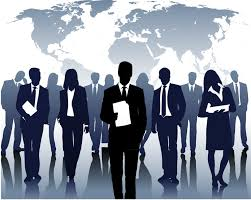

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # 
import pandas as pd #
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ds4work-human-resources/Human_Resources.csv


# VERİ YÜKLEME & LOAD DATA

In [2]:
df = pd.read_csv("/kaggle/input/ds4work-human-resources/Human_Resources.csv")

In [3]:
data=df.copy()

In [4]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

# VERİ ÖN İŞLEME & DATA PREPROCESSING
**Veri Tanımlayıcı İstatistikler & Data Descriptive Statistics**

In [5]:
def veritnma(dataframe,head=True):
    print("-----------------------------------------SHAPE------------------------------------------")#Veri Seti Boyutları
    print(dataframe.shape)
    print("----------------------------------------İNFO--------------------------------------------")#Veri Seti İnfo Değerleri
    print(dataframe.info())
    print("----------------------------------------İSNULL-------------------------------------------")#Veri Seti Boş Değerleri
    print(dataframe.isnull().sum().sort_values(ascending=True))
    print("----------------------------------------NUNİQUE-------------------------------------------")#Veri Seti Benzersiz Değerleri
    print(dataframe.nunique())
    print("----------------------------------------DESCRİBE-------------------------------------------")#Tanımlayıcı İstatistikler
    display(dataframe.describe())
    if head:
        print("------------------------------------HEAD------------------------------------------------")#Veri Setinin İlk 5 verisi
        display(dataframe.head())
        print("------------------------------------TAIL-------------------------------------------------")#Veri Setinin Son 5 verisi
        display(dataframe.tail())

In [6]:
veritnma(df,head=True)

-----------------------------------------SHAPE------------------------------------------
(1470, 35)
----------------------------------------İNFO--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 1

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

------------------------------------HEAD------------------------------------------------


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

------------------------------------TAIL-------------------------------------------------


Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

**EKSİK DEĞERLER**

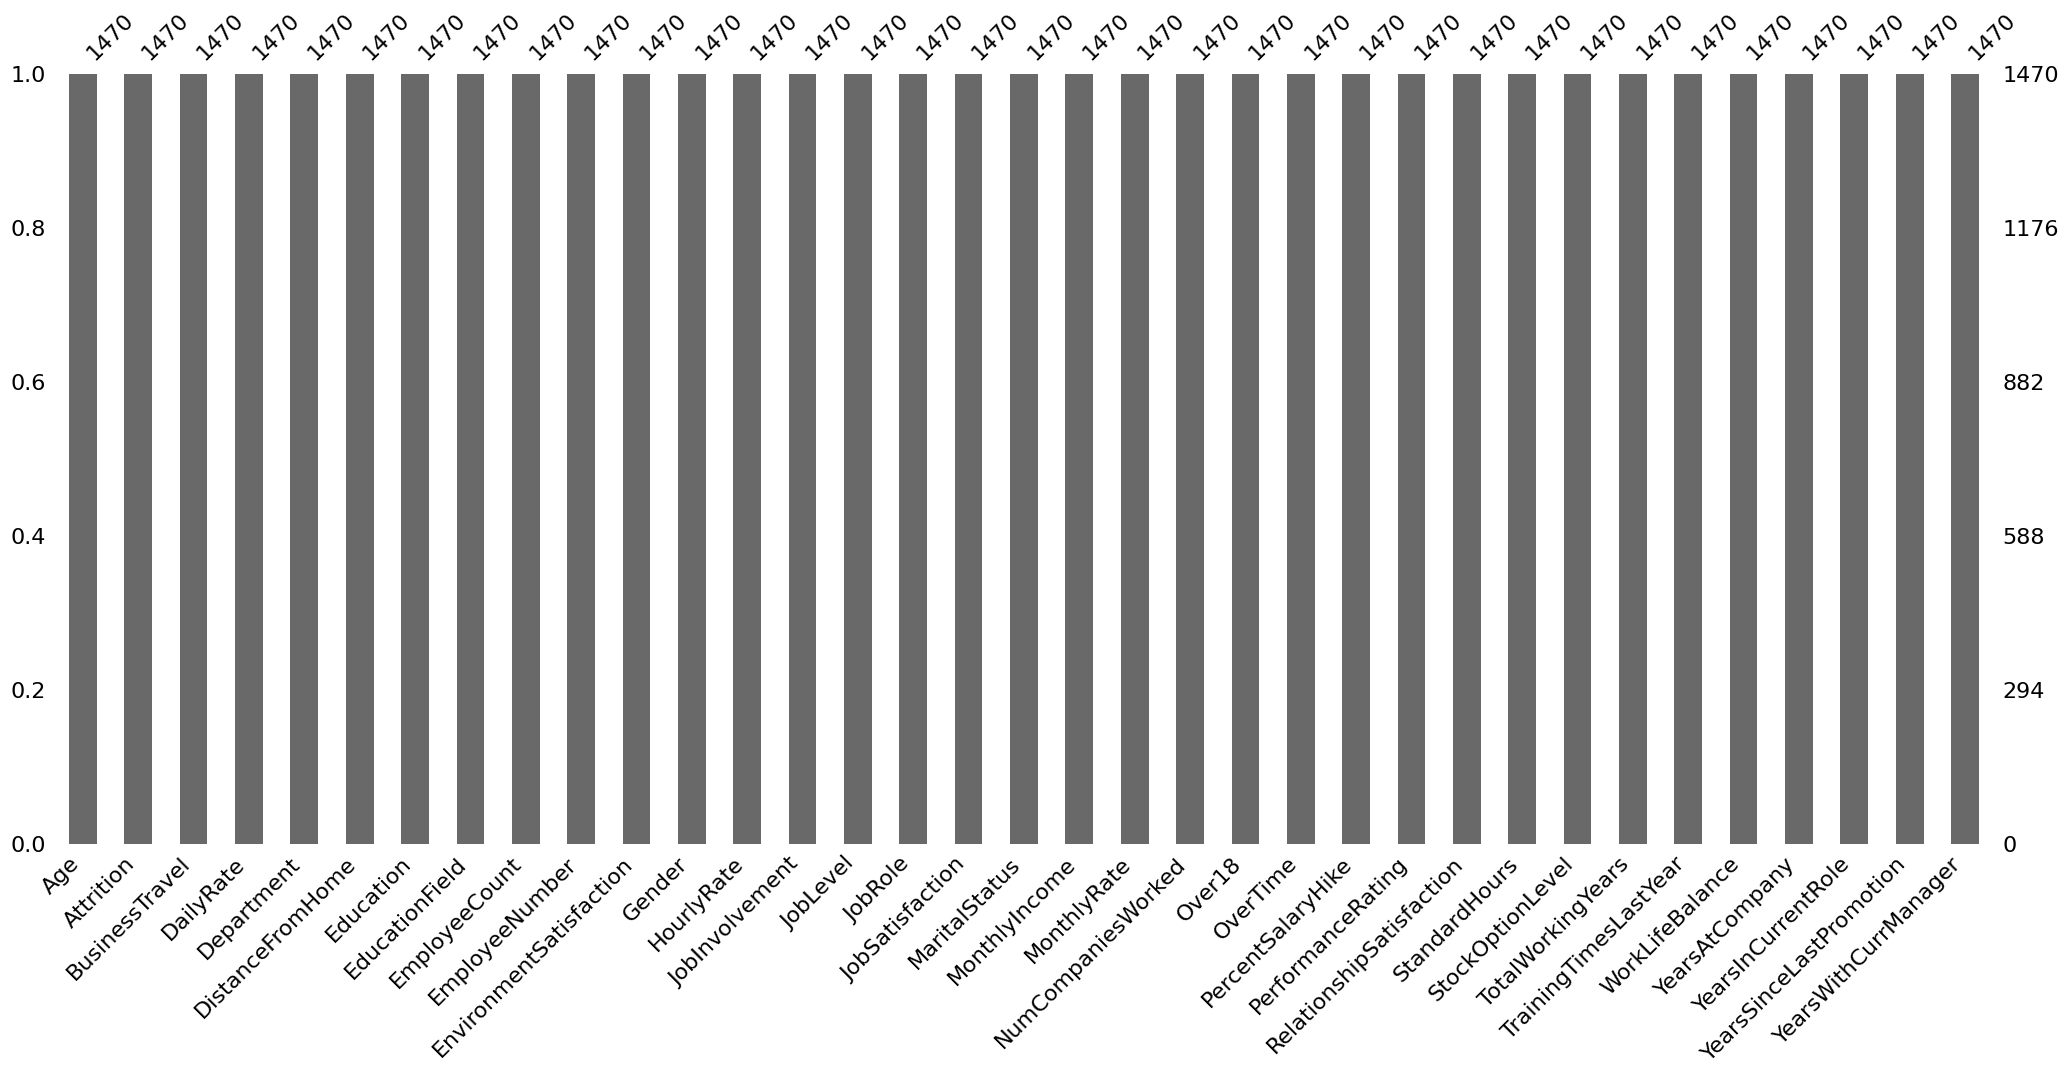

In [7]:
msno.bar(df);

**Veri Seti Açıklamalar**: `Human_Resources.csv`

**Genel Bilgiler**
- **Satırlar:** 1470  
- **Sütunlar:** 35  

---

**Nitelik Açıklamaları**

| STT | Nitelik Adı                | Anlamı                                               |
|-----|----------------------------|-----------------------------------------------------|
| 1   | **Age**                   | Çalışanın yaşı                                       |
| 2   | **Gender**                | Çalışanın cinsiyeti                                  |
| 3   | **BusinessTravel**        | Çalışanların iş seyahatlerinin sıklığı              |
| 4   | **DailyRate**             | Çalışanlar için günlük maaş oranı                   |
| 5   | **Departman**             | Çalışan ofisi                                       |
| 6   | **DistanceFromHome**      | Evden işe kadar olan mesafe (mil)                   |
| 7   | **Eğitim**                | Personelin elde ettiği eğitim düzeyi                |
| 8   | **EducationField**        | Çalışanın çalışma alanı                             |
| 9   | **EmployeeCount**         | Kuruluştaki toplam çalışan sayısı                   |
| 10  | **EmployeeNumber**        | Her çalışan kaydı için benzersiz bir tanımlayıcı    |
| 11  | **EnvironmentSatisfaction** | Çalışanların çalışma ortamlarından memnuniyetleri  |
| 12  | **HourlyRate**            | Çalışanlar için saatlik ücret                       |
| 13  | **JobInvolvement**        | Çalışanın işi için gereken katılım düzeyi           |
| 14  | **JobLevel**              | Çalışanın çalışma düzeyi                            |
| 15  | **JobRole**               | Çalışanların kuruluştaki rolü                       |
| 16  | **JobSatisfaction**       | Çalışanların işlerinden memnuniyetleri              |
| 17  | **MaritalStatus**         | Çalışanın medeni durumu                             |
| 18  | **MonthlyIncome**         | Çalışanın aylık geliri                              |
| 19  | **MonthlyRate**           | Çalışanlar için aylık maaş oranı                   |
| 20  | **NumCompaniesWorked**    | Çalışanın çalıştığı şirket sayısı                   |
| 21  | **Over18**                | Çalışanın 18 yaşından büyük olup olmadığı           |
| 22  | **OverTime**              | Çalışanlar fazla mesai yapıyor mu                  |
| 23  | **PercentSalaryHike**     | Çalışanlar için maaş artış oranı                   |
| 24  | **PerformanceRating**     | Çalışanın performans derecesi                      |
| 25  | **RelationshipSatisfaction** | Çalışanların ilişkilerinden memnuniyeti          |
| 26  | **StandardHours**         | Çalışanlar için standart çalışma saatleri           |
| 27  | **StockOptionLevel**      | Çalışan hisse senedi opsiyon seviyesi              |
| 28  | **TotalWorkingYears**     | Çalışanın çalıştığı toplam yıl sayısı              |
| 29  | **TrainingTimesLastYear** | Çalışanların son yılda eğitime götürüldüğü zaman sayısı |
| 30  | **WorkLifeBalance**       | Çalışanların iş-yaşam dengelerine ilişkin algıları  |
| 31  | **YearsAtCompany**        | Çalışanların şirkette olduğu yıl sayısı            |
| 32  | **YearsInCurrentRole**    | Çalışanın mevcut rolünde olduğu yıl sayısı          |
| 33  | **YearsSinceLastPromotion** | Çalışanın son terfisinden bu yana geçen yıl sayısı |
| 34  | **YearsWithCurrManager**  | Bir çalışanın mevcut yöneticisiyle geçirdiği yıl sayısı |
| 35  | **Attrition**             | Çalışan kuruluştan ayrılıyor mu                    |

---

**Sınıflandırma Sütunlarının Anlamı**

| Nitelik                | Değer | Anlamı                  |
|------------------------|-------|-------------------------|
| **Eğitim**            | 1     | Üniversite Altı         |
|                        | 2     | Üniversite              |
|                        | 3     | Lisans                 |
|                        | 4     | Yüksek Lisans          |
|                        | 5     | Doktora                |
| **Ortam Memnuniyeti**  | 1     | Düşük                  |
|                        | 2     | Orta                   |
|                        | 3     | Yüksek                 |
|                        | 4     | Çok Yüksek             |
| **İş Katılımı**        | 1     | Düşük                  |
|                        | 2     | Orta                   |
|                        | 3     | Yüksek                 |
|                        | 4     | Çok Yüksek             |
| **İş Memnuniyeti**     | 1     | Düşük                  |
|                        | 2     | Orta                   |
|                        | 3     | Yüksek                 |
|                        | 4     | Çok Yüksek             |
| **Performans Derecesi**| 1     | Düşük                  |
|                        | 2     | İyi                    |
|                        | 3     | Mükemmel               |
|                        | 4     | Olağanüstü             |
| **İlişki Memnuniyeti** | 1     | Düşük                  |
|                        | 2     | Orta                   |
|                        | 3     | Yüksek                 |
|                        | 4     | Çok Yüksek             |
| **İş Yaşam Dengesi**   | 1     | Kötü                   |
|                        | 2     | İyi                    |
|                        | 3     | Daha İyi               |
|                        | 4     | En İyi                 |


**DEĞİŞKEN SINIFLANDIRMASI & VARIABLE CLASSIFICATION**

In [8]:
def değişkensınıf(dataframe,cat_th=15):
    cat = [col for col in dataframe.columns if dataframe[col].dtypes=="O"]
    num = [col for col in dataframe.columns if dataframe[col].dtypes!="O"]
    cat_but_num = [col for col in dataframe.columns if dataframe[col].dtypes=="O"
                  and dataframe[col].nunique()>cat_th]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes!="O"
                  and  dataframe[col].nunique()<cat_th]
    cat = cat + num_but_cat
    cat = [col for col in cat if col not in cat_but_num]
    num = [col for col in num if col  not in num_but_cat]
    return (cat,num,cat_but_num)

In [9]:
cat,num,cat_but_num = değişkensınıf(df,cat_th=15)

In [10]:
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [11]:
df[cat]

Attrition     BusinessTravel              Department EducationField  \
0          Yes      Travel_Rarely                   Sales  Life Sciences   
1           No  Travel_Frequently  Research & Development  Life Sciences   
2          Yes      Travel_Rarely  Research & Development          Other   
3           No  Travel_Frequently  Research & Development  Life Sciences   
4           No      Travel_Rarely  Research & Development        Medical   
...        ...                ...                     ...            ...   
1465        No  Travel_Frequently  Research & Development        Medical   
1466        No      Travel_Rarely  Research & Development        Medical   
1467        No      Travel_Rarely  Research & Development  Life Sciences   
1468        No  Travel_Frequently                   Sales        Medical   
1469        No      Travel_Rarely  Research & Development        Medical   

      Gender                    JobRole MaritalStatus Over18 OverTime  \
0     Female            Sales Executive        Single      Y      Yes   
1       Male         Research Scientist       Married      Y       No   
2       Male      Laboratory Technician        Single      Y      Yes   
3     Female         Research Scientist       Married      Y      Yes   
4       Male      Laboratory Technician       Married      Y       No   
...      ...                        ...           ...    ...      ...   
1465    Male      Laboratory Technician       Married      Y       No   
1466    Male  Healthcare Representative       Married      Y       No   
1467    Male     Manufacturing Director       Married      Y      Yes   
1468    Male            Sales Executive       Married      Y       No   
1469    Male      Laboratory Technician       Married      Y       No   

      Education  ...  JobInvolvement  JobLevel  JobSatisfaction  \
0             2  ...               3         2                4   
1             1  ...               2         2                2   
2             2  ...               2         1                3   
3             4  ...               3         1                3   
4             1  ...               3         1                2   
...         ...  ...             ...       ...              ...   
1465          2  ...               4         2                4   
1466          1  ...               2         3                1   
1467          3  ...               4         2                2   
1468          3  ...               2         2                2   
1469          3  ...               4         2                3   

      NumCompaniesWorked  PerformanceRating  RelationshipSatisfaction  \
0                      8                  3                         1   
1                      1                  4                         4   
2                      6                  3                         2   
3                      1                  3                         3   
4                      9                  3                         4   
...                  ...                ...                       ...   
1465                   4                  3                         3   
1466                   4                  3                         1   
1467                   1                  4                         2   
1468                   2                  3                         4   
1469                   2                  3                         1   

      StandardHours  StockOptionLevel  TrainingTimesLastYear  WorkLifeBalance  
0                80                 0                      0                1  
1                80                 1                      3                3  
2                80                 0                      3                3  
3                80                 0                      3                3  
4                80                 1                      3                3  
...             ...               ...                

In [12]:
df[num]

Age  DailyRate  DistanceFromHome  EmployeeNumber  HourlyRate  \
0      41       1102                 1               1          94   
1      49        279                 8               2          61   
2      37       1373                 2               4          92   
3      33       1392                 3               5          56   
4      27        591                 2               7          40   
...   ...        ...               ...             ...         ...   
1465   36        884                23            2061          41   
1466   39        613                 6            2062          42   
1467   27        155                 4            2064          87   
1468   49       1023                 2            2065          63   
1469   34        628                 8            2068          82   

      MonthlyIncome  MonthlyRate  PercentSalaryHike  TotalWorkingYears  \
0              5993        19479                 11                  8   
1              5130        24907                 23                 10   
2              2090         2396                 15                  7   
3              2909        23159                 11                  8   
4              3468        16632                 12                  6   
...             ...          ...                ...                ...   
1465           2571        12290                 17                 17   
1466           9991        21457                 15                  9   
1467           6142         5174                 20                  6   
1468           5390        13243                 14                 17   
1469           4404        10228                 12                  6   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5                   2                        0   
1466               7                   7                        1   
1467               6                   2                        0   
1468               9                   6                        0   
1469               4                   3                        1   

      YearsWithCurrManager  
0                        5  
1                        7  
2                        0  
3                        0  
4                        2  
...                    ...  
1465                     3  
1466                     7  
1467                     3  
1468                     8  
1469                     2  

[1470 rows x 13 columns]

**Çalışılan Şirket Sayısı, Son Yıl Eğitim Süreleri, Standart Saatler sayısal oldukları için num listesine aktarılır.**

-----------------------------------------------
**Number of Companies Worked, Last Year Education Periods, Standard Hours are transferred to the num list since they are numerical.**

In [13]:
no_move = ["NumCompaniesWorked", "StandardHours", "TrainingTimesLastYear"]
cat = [col for col in cat if col not in no_move]
num = num + no_move

In [14]:
df[num]

Age  DailyRate  DistanceFromHome  EmployeeNumber  HourlyRate  \
0      41       1102                 1               1          94   
1      49        279                 8               2          61   
2      37       1373                 2               4          92   
3      33       1392                 3               5          56   
4      27        591                 2               7          40   
...   ...        ...               ...             ...         ...   
1465   36        884                23            2061          41   
1466   39        613                 6            2062          42   
1467   27        155                 4            2064          87   
1468   49       1023                 2            2065          63   
1469   34        628                 8            2068          82   

      MonthlyIncome  MonthlyRate  PercentSalaryHike  TotalWorkingYears  \
0              5993        19479                 11                  8   
1              5130        24907                 23                 10   
2              2090         2396                 15                  7   
3              2909        23159                 11                  8   
4              3468        16632                 12                  6   
...             ...          ...                ...                ...   
1465           2571        12290                 17                 17   
1466           9991        21457                 15                  9   
1467           6142         5174                 20                  6   
1468           5390        13243                 14                 17   
1469           4404        10228                 12                  6   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5                   2                        0   
1466               7                   7                        1   
1467               6                   2                        0   
1468               9                   6                        0   
1469               4                   3                        1   

      YearsWithCurrManager  NumCompaniesWorked  StandardHours  \
0                        5                   8             80   
1                        7                   1             80   
2                        0                   6             80   
3                        0                   1             80   
4                        2                   9             80   
...                    ...                 ...            ...   
1465                     3                   4             80   
1466                     7                   4             80   
1467                     3                   1             80   
1468                     8                   2             80   
1469                     2                   2             80   

      TrainingTimesLastYear  
0                         0  
1                         3  
2                         3  
3                         3  
4                         3  
...                     ...  
1465                      3  
1466                      5  
1467                      0  
1468                      3  
1469                      3  

[1470 rows x 16 columns]

**Nümerik Değişkenlerin Birbiri Arasındaki Korelasyonu**

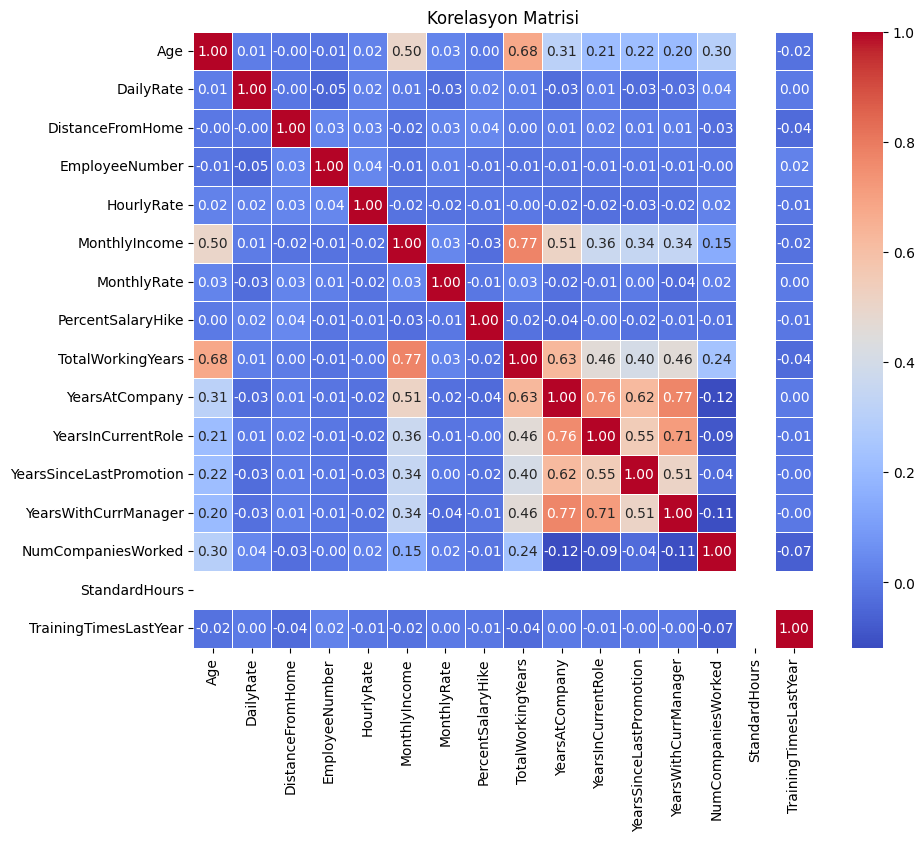

In [15]:
correlation_matrix =df[num].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

**Yüksek Korelasyona Sahip Değişkenleri Siliyoruz & We Delete Variables with High Correlation**

In [16]:
num = [col for col in num if col not in ["YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager"] ]

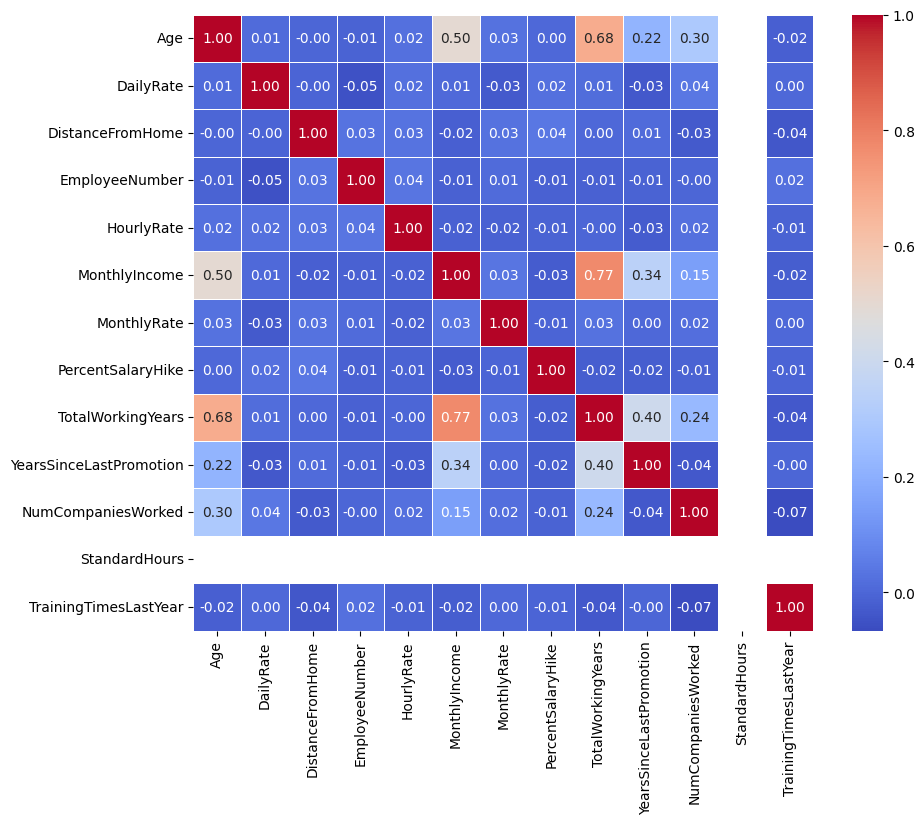

In [17]:
correlation_matrix=df[num].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.show()

**Çalışanın Maaşı İle İşte Kalma Arasındaki Korelasyon**




**Correlation Between Employee Salary and Retention**

<Axes: >

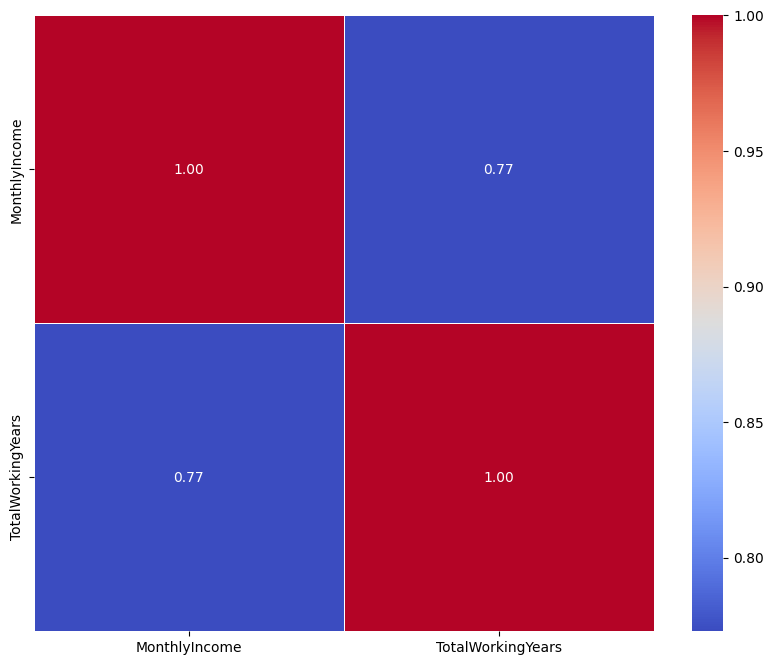

In [18]:
korele = ['MonthlyIncome','TotalWorkingYears']
correlation_matrix=df[korele].corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)

**Hisse Senedi,İş Seviyesi değişkenleri kategoriktir ancak maskelenmişti**

--------------------------------------------------------------------

**StockOptionLeve,JobLevel variables are categorical but masked**

**Maskeli Kategorik  Sütunlarının Anlamı**

| Nitelik                | Değer | Anlamı                  |
|------------------------|-------|-------------------------|
| **Eğitim**            | 1     | Üniversite Altı         |
|                        | 2     | Üniversite              |
|                        | 3     | Lisans                 |
|                        | 4     | Yüksek Lisans          |
|                        | 5     | Doktora                |
| **Ortam Memnuniyeti**  | 1     | Düşük                  |
|                        | 2     | Orta                   |
|                        | 3     | Yüksek                 |
|                        | 4     | Çok Yüksek             |
| **İş Katılımı**        | 1     | Düşük                  |
|                        | 2     | Orta                   |
|                        | 3     | Yüksek                 |
|                        | 4     | Çok Yüksek             |
| **İş Memnuniyeti**     | 1     | Düşük                  |
|                        | 2     | Orta                   |
|                        | 3     | Yüksek                 |
|                        | 4     | Çok Yüksek             |
| **Performans Derecesi**| 1     | Düşük                  |
|                        | 2     | İyi                    |
|                        | 3     | Mükemmel               |
|                        | 4     | Olağanüstü             |
| **İlişki Memnuniyeti** | 1     | Düşük                  |
|                        | 2     | Orta                   |
|                        | 3     | Yüksek                 |
|                        | 4     | Çok Yüksek             |
| **İş Yaşam Dengesi**   | 1     | Kötü                   |
|                        | 2     | İyi                    |
|                        | 3     | Daha İyi               |
|                        | 4     | En İyi                 |
| **Hisse Senedi**       | 0     | Hiçbir Seviye          |
|                        | 1     | Düşük Seviye           |
|                        | 2     | Orta Seviye            |
|                        | 3     | Yüksek Seviye          |
| **İş Seviyesi**        | 1     | Giriş Seviyesi         |
|                        | 2     | Ara Seviye             |
|                        | 3     | Üst Seviye             |
|                        | 4     | Yönetici Seviyesi      |


# VERİ GÖRSELLEŞTİRME & DATA VISUALIZATION

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


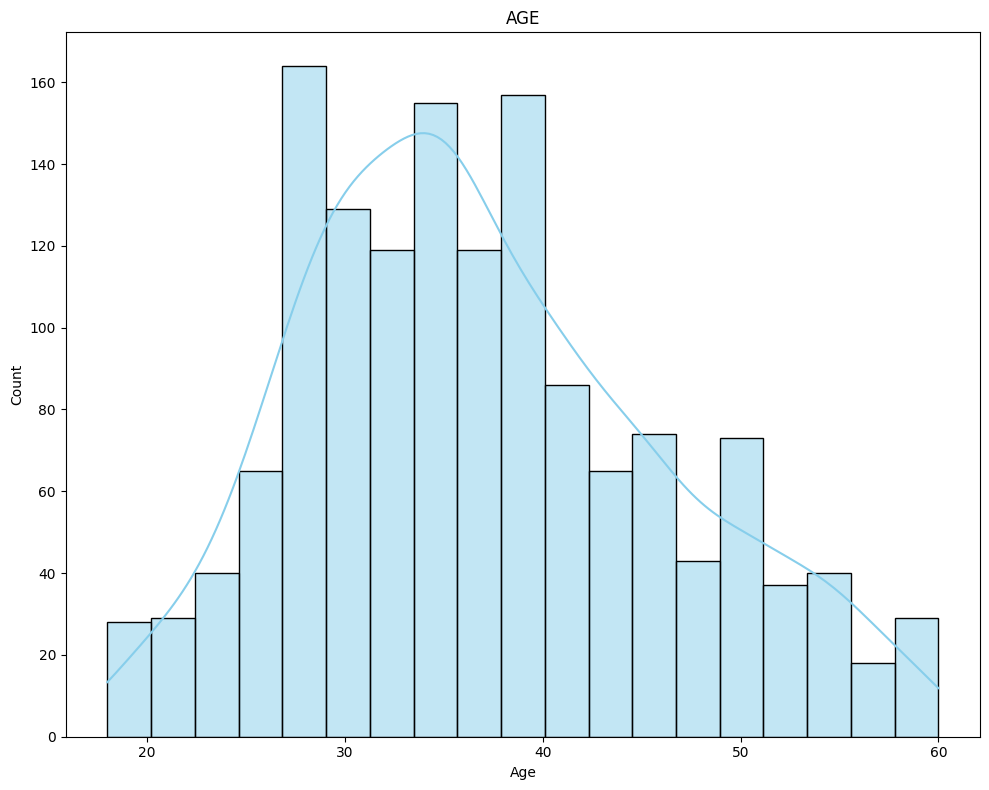

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


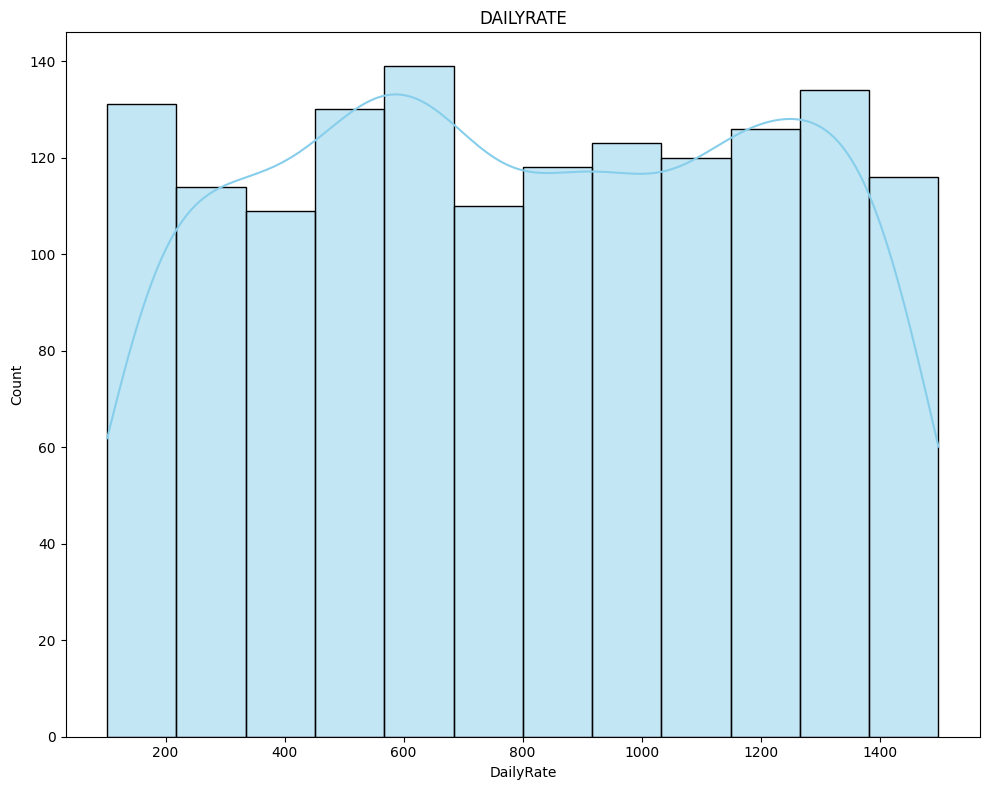

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


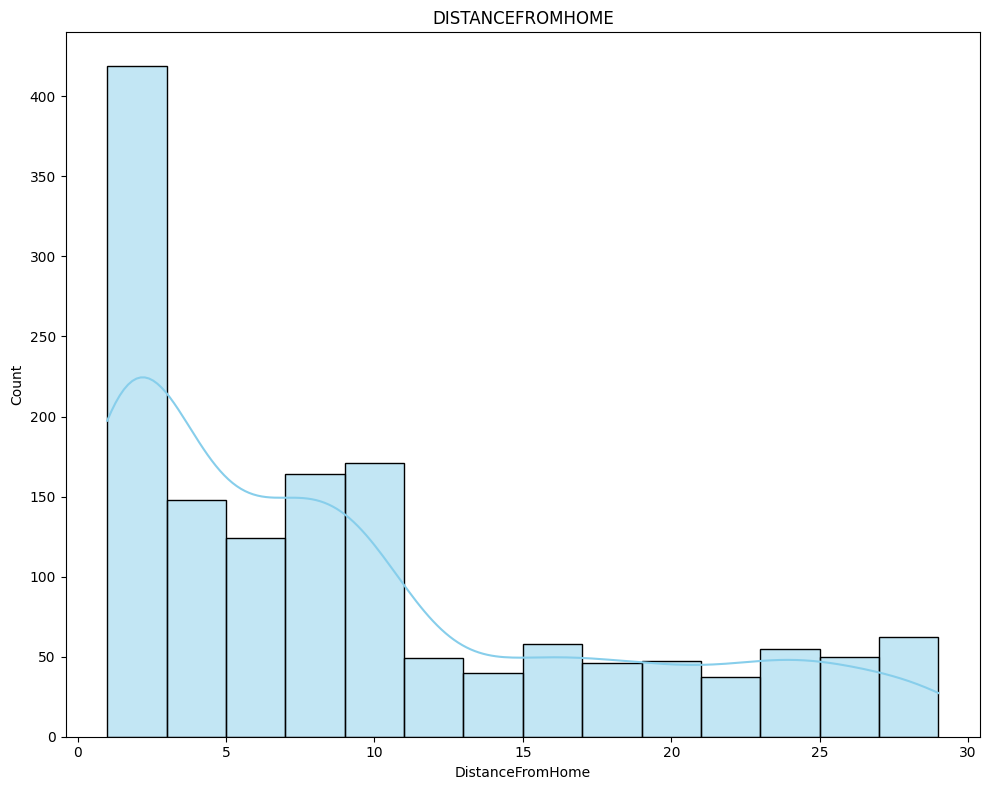

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


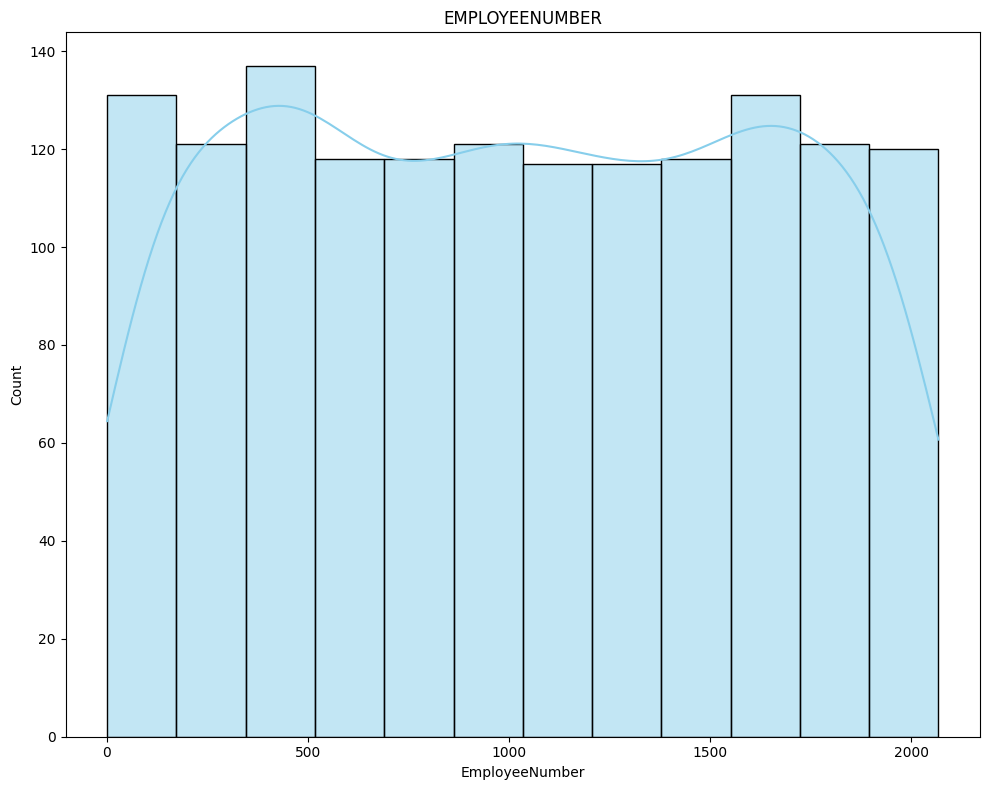

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


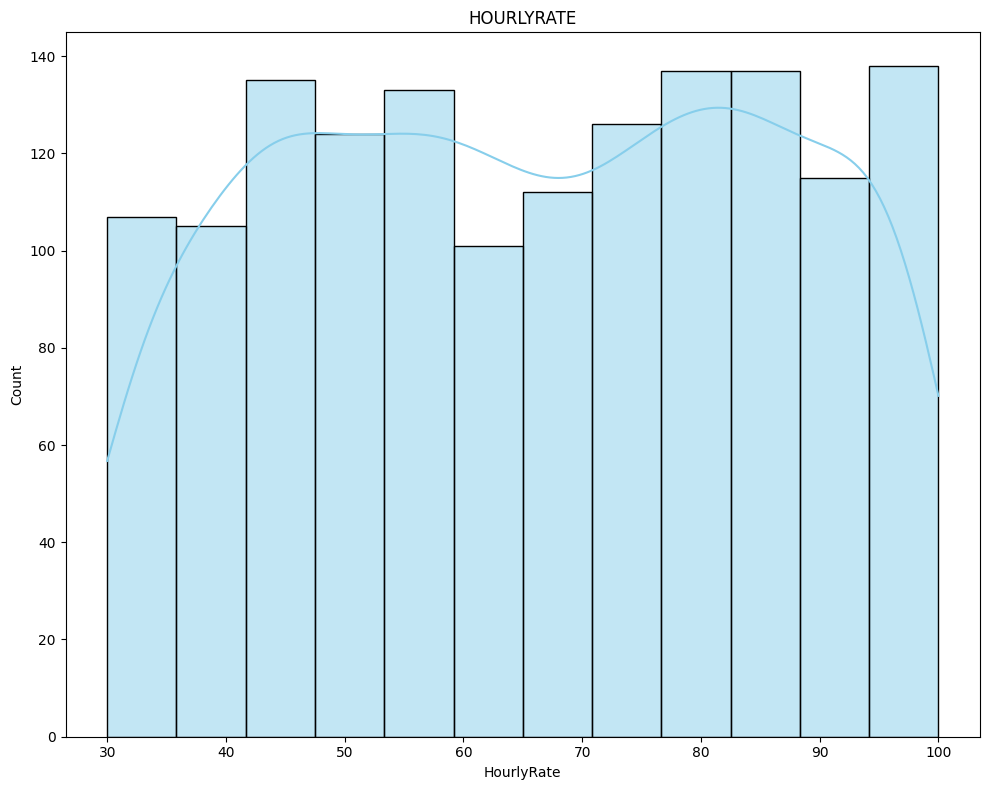

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


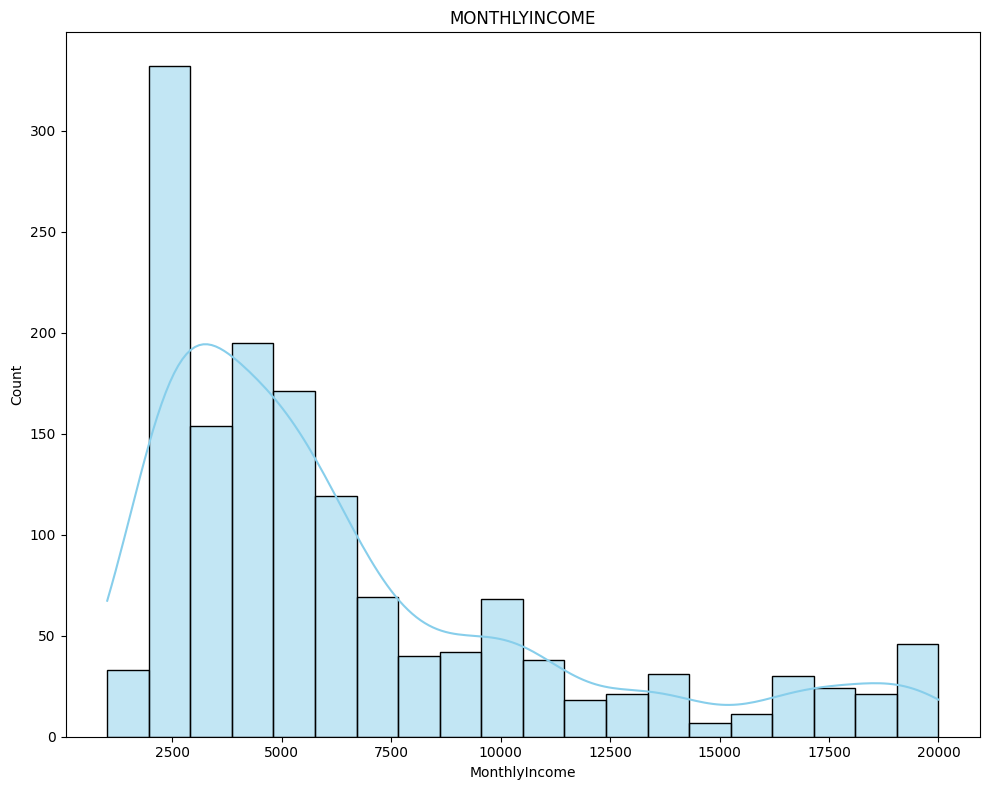

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


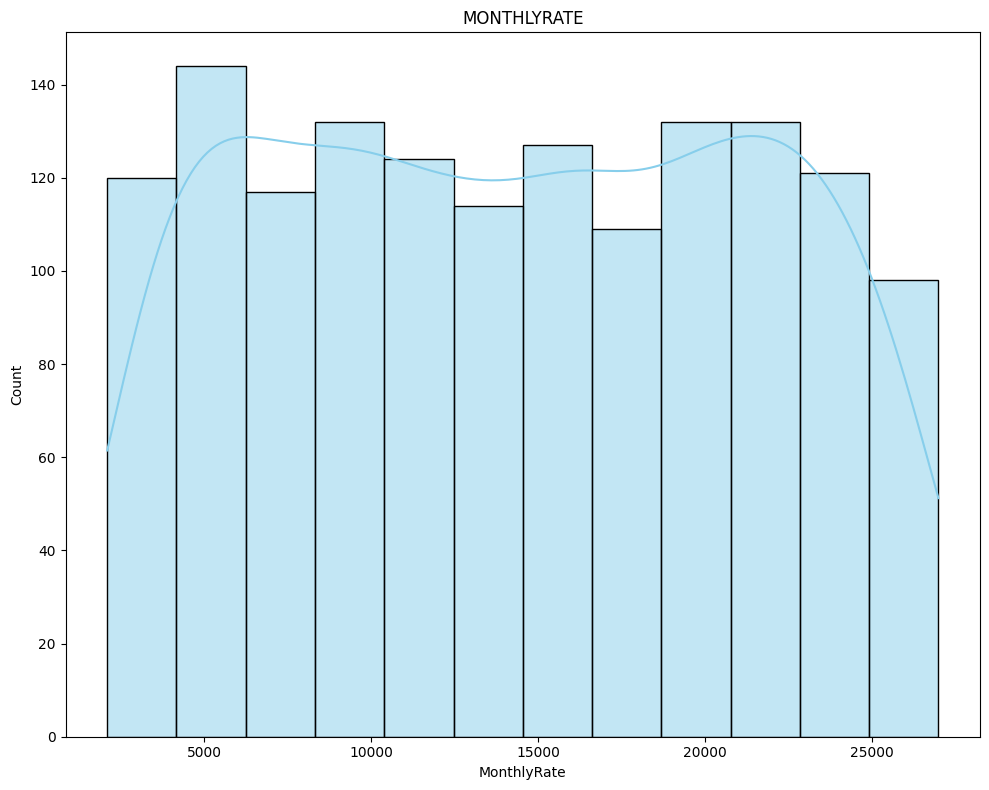

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


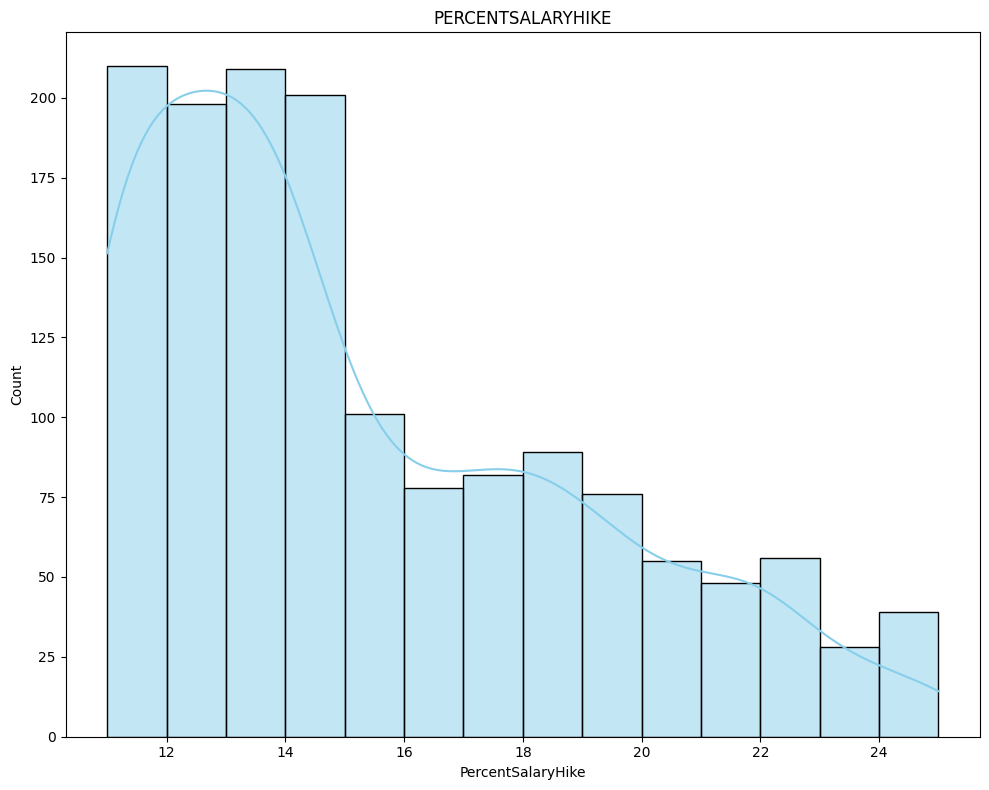

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


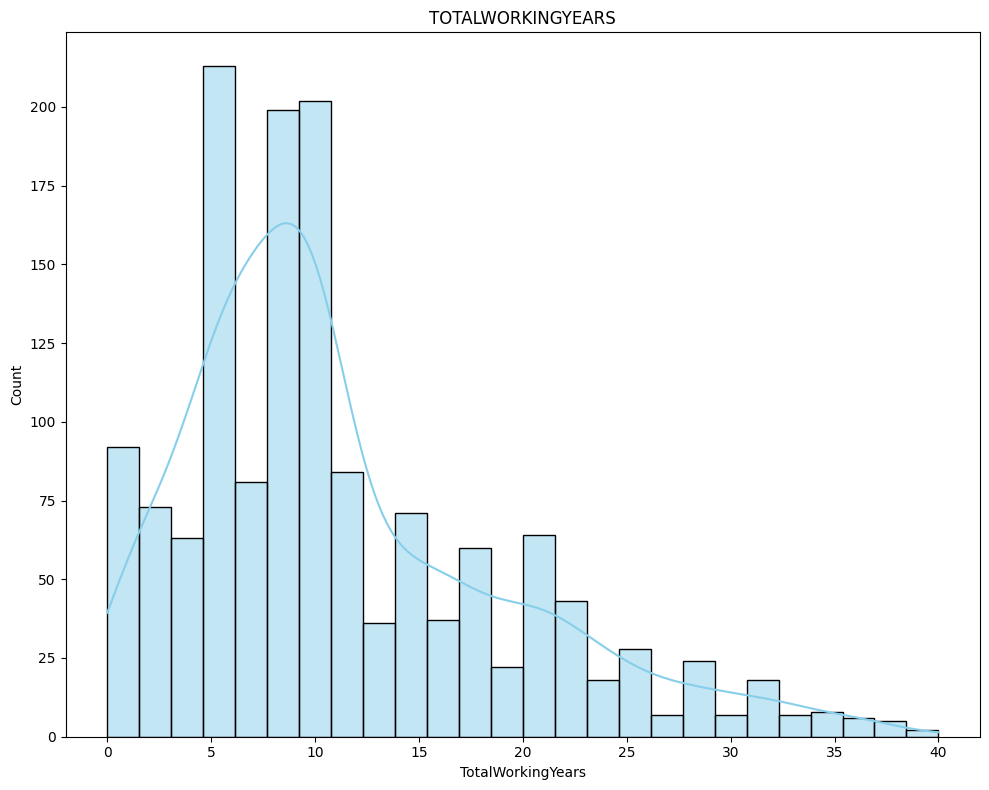

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


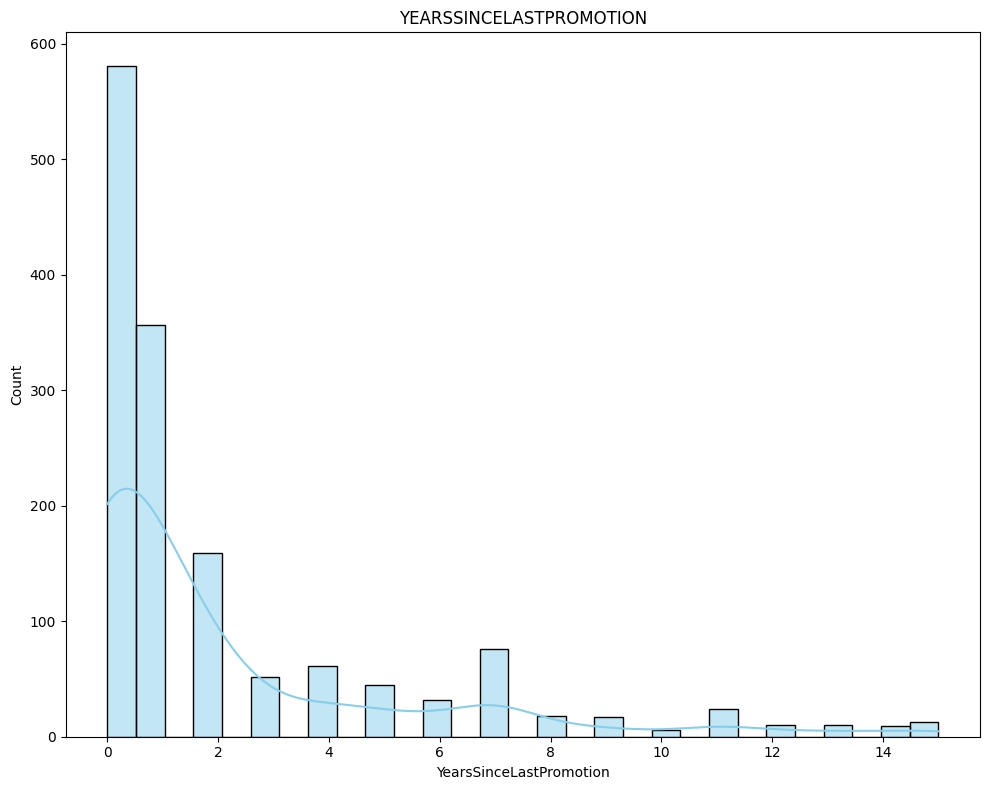

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


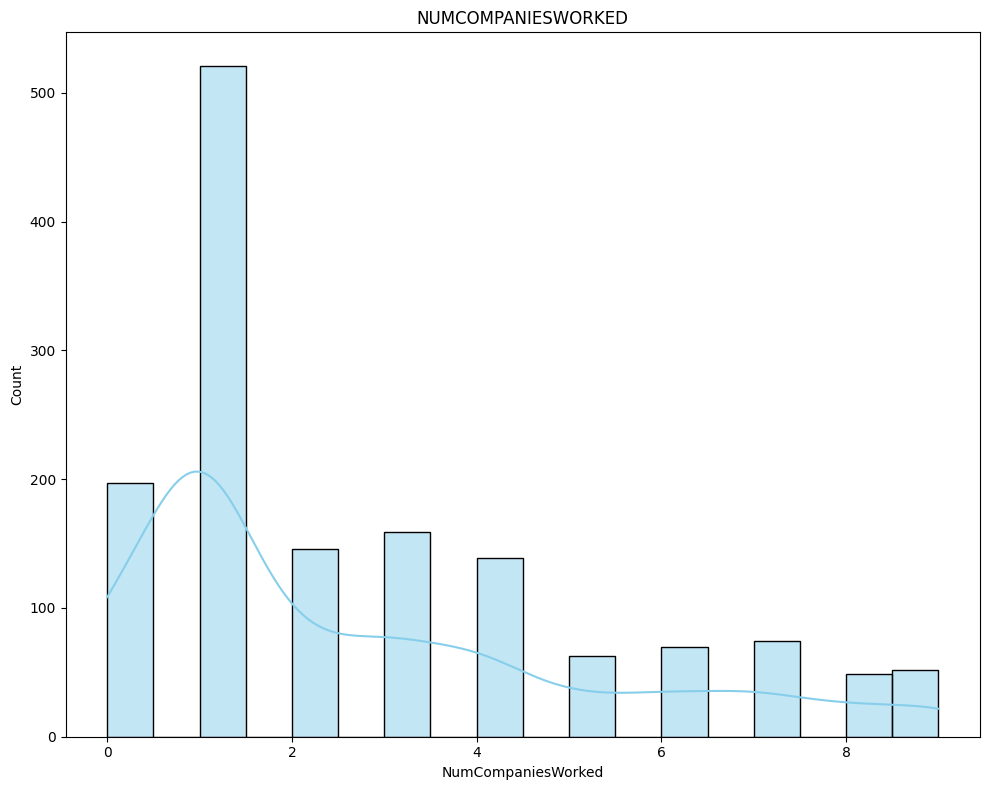

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


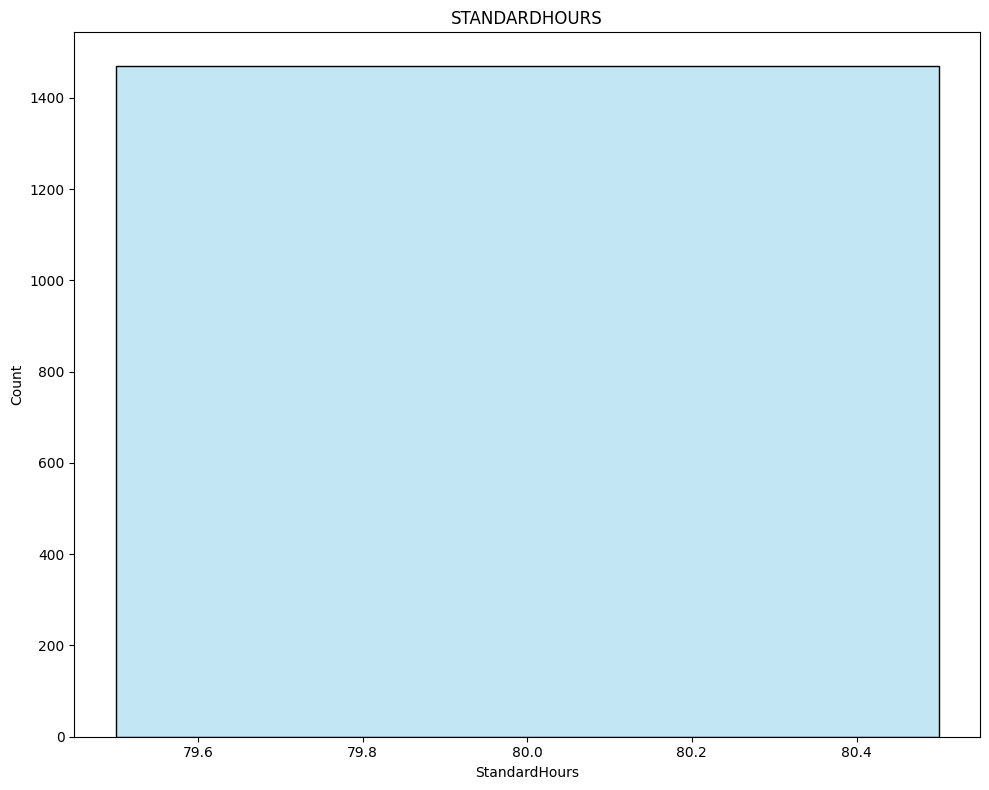

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


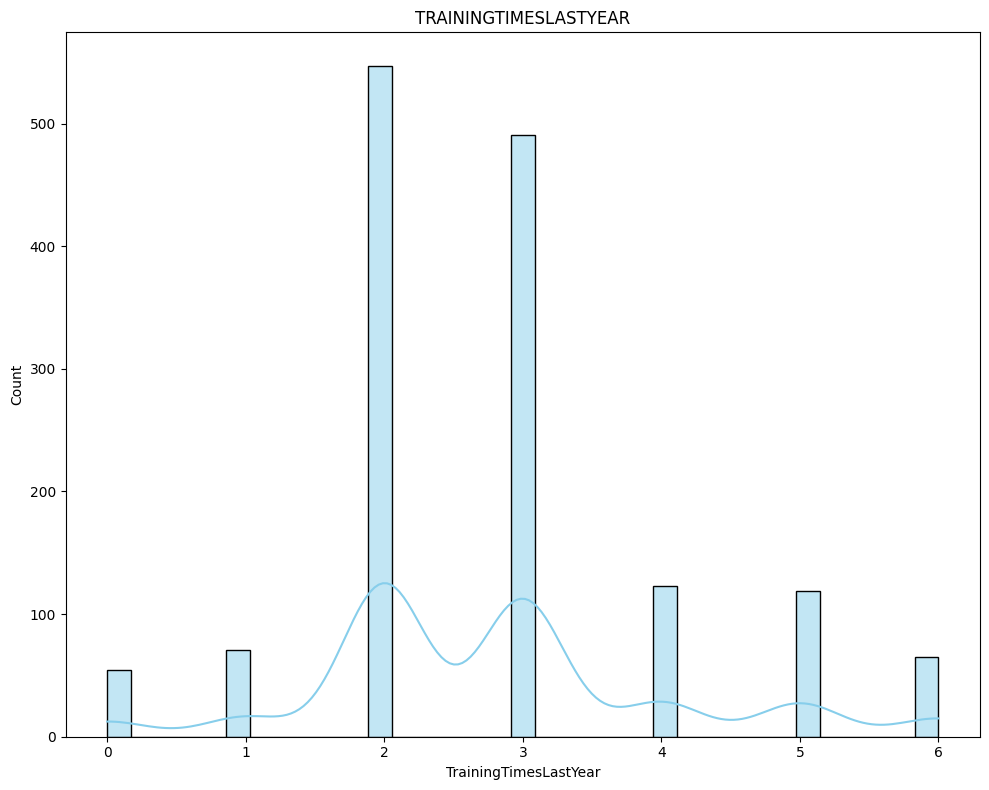

In [19]:
for col in num:
    plt.figure(figsize=(10,8))
    sns.histplot(data=df,x=col,kde=True,color='skyblue')
    plt.title(col.upper())
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


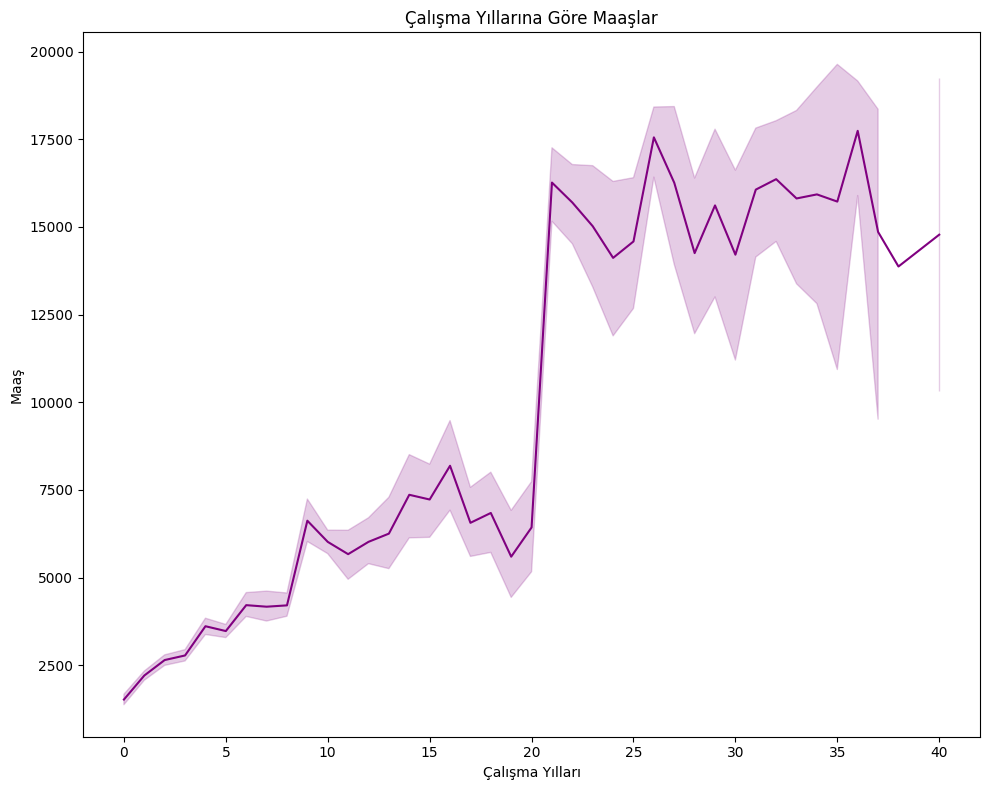

In [20]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='TotalWorkingYears',y='MonthlyIncome',color='purple')
plt.title("Çalışma Yıllarına Göre Maaşlar")
plt.xlabel("Çalışma Yılları")
plt.ylabel("Maaş")
plt.tight_layout()
plt.show()

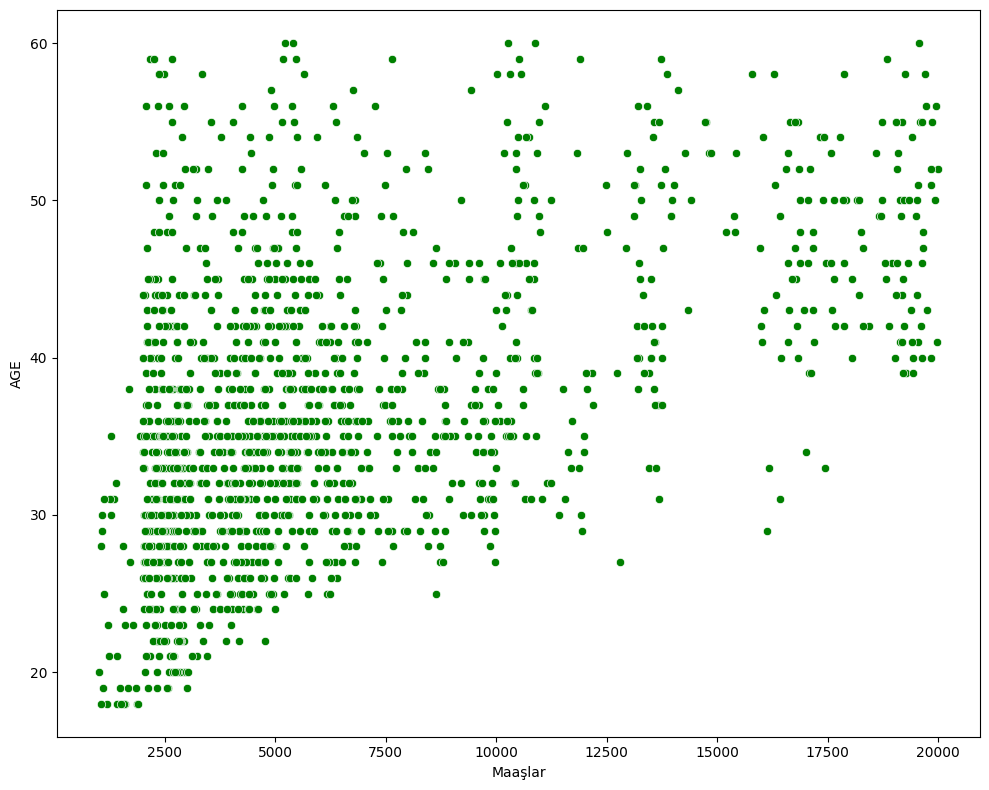

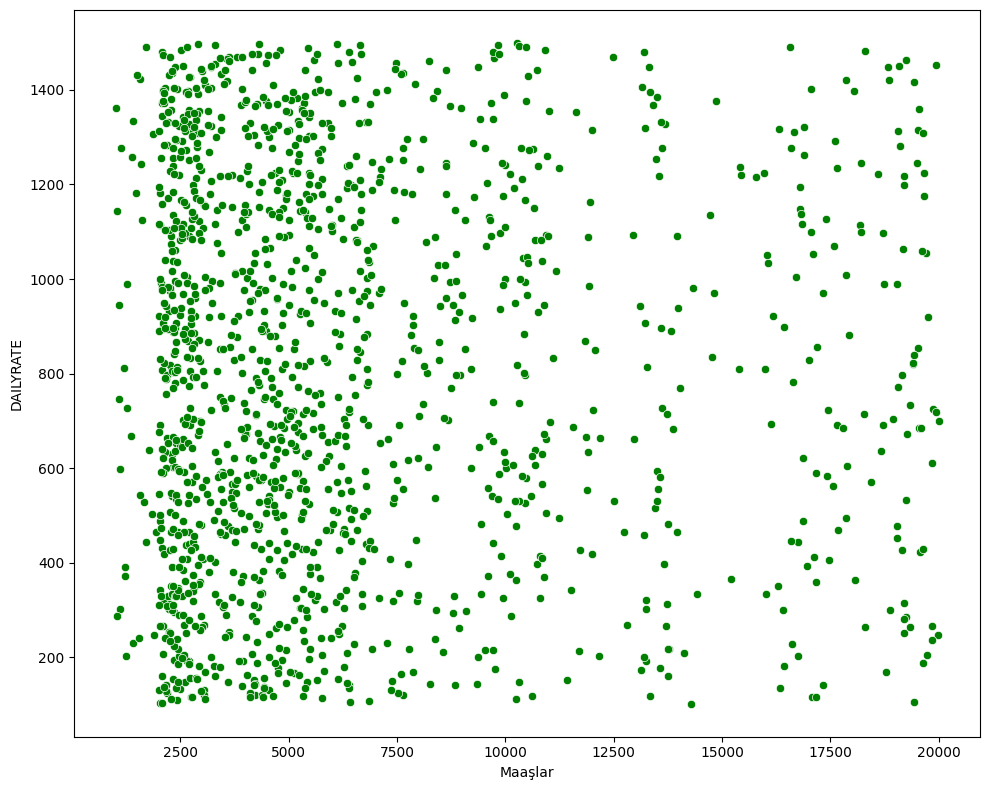

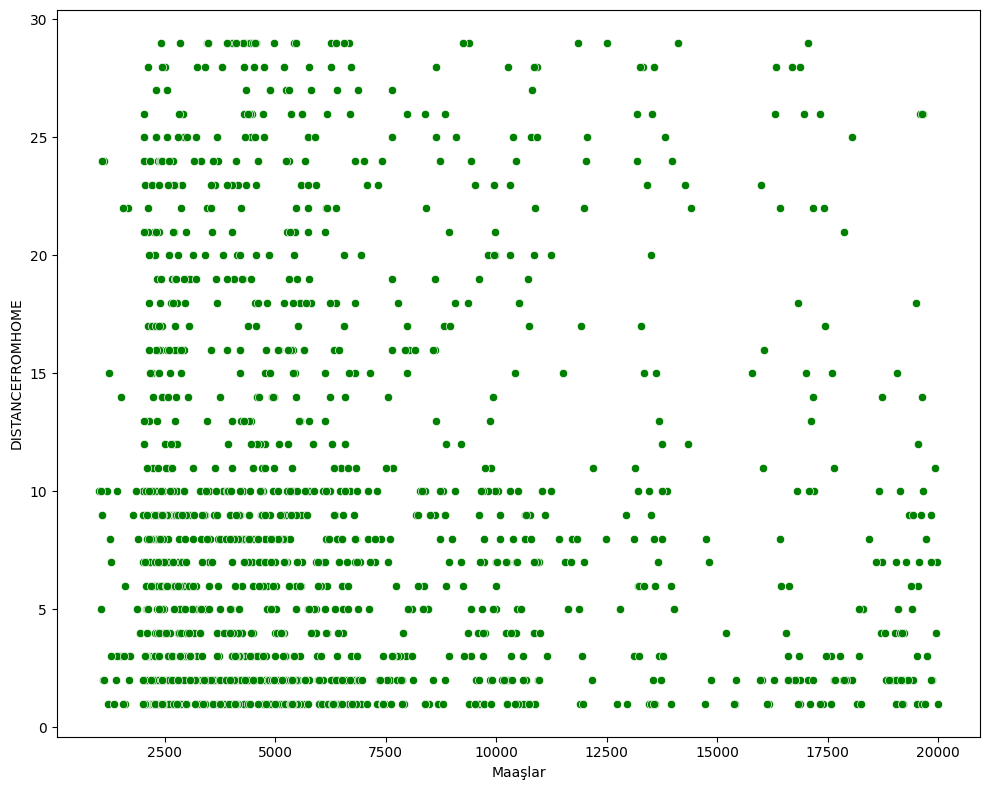

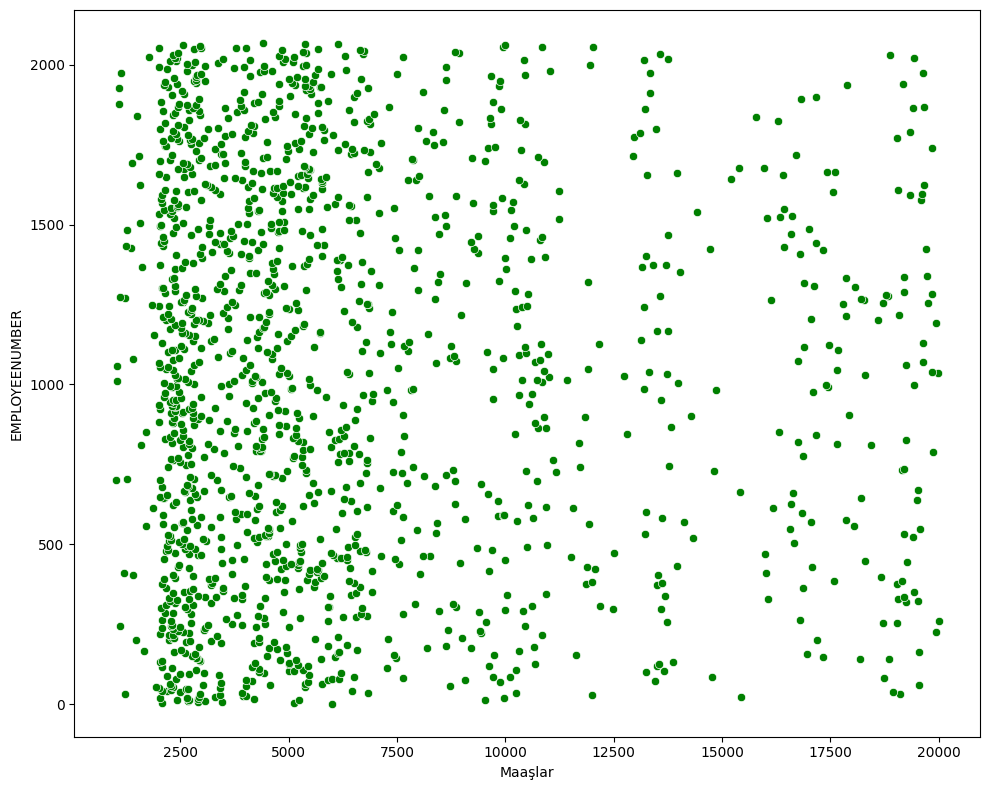

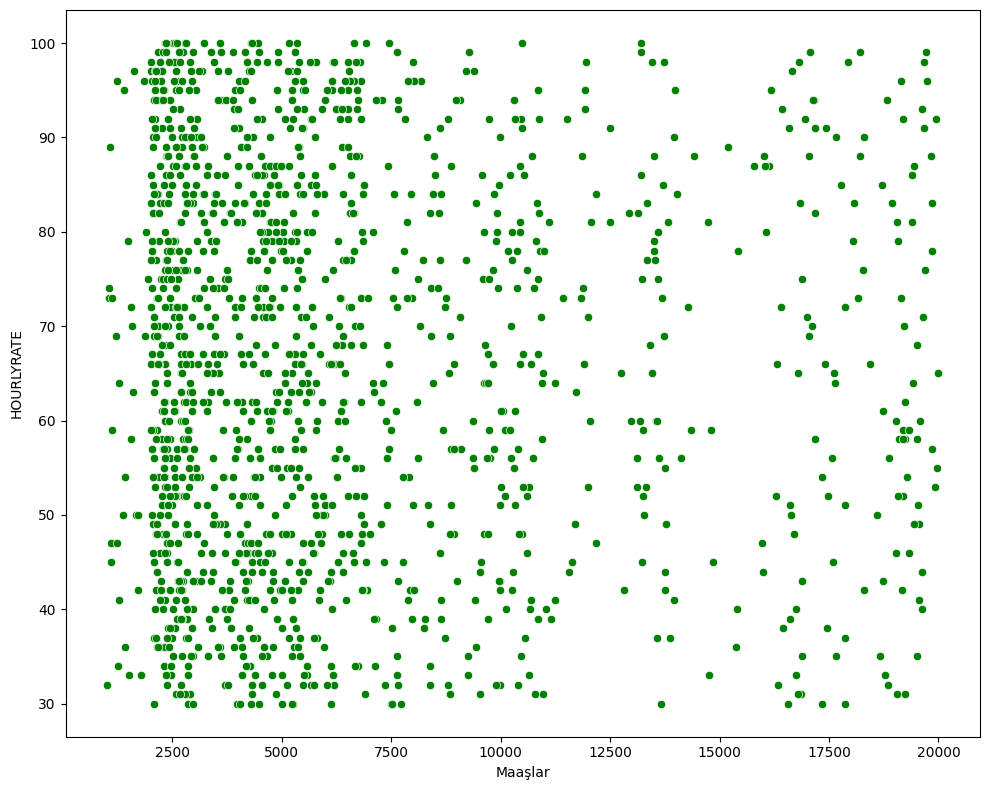

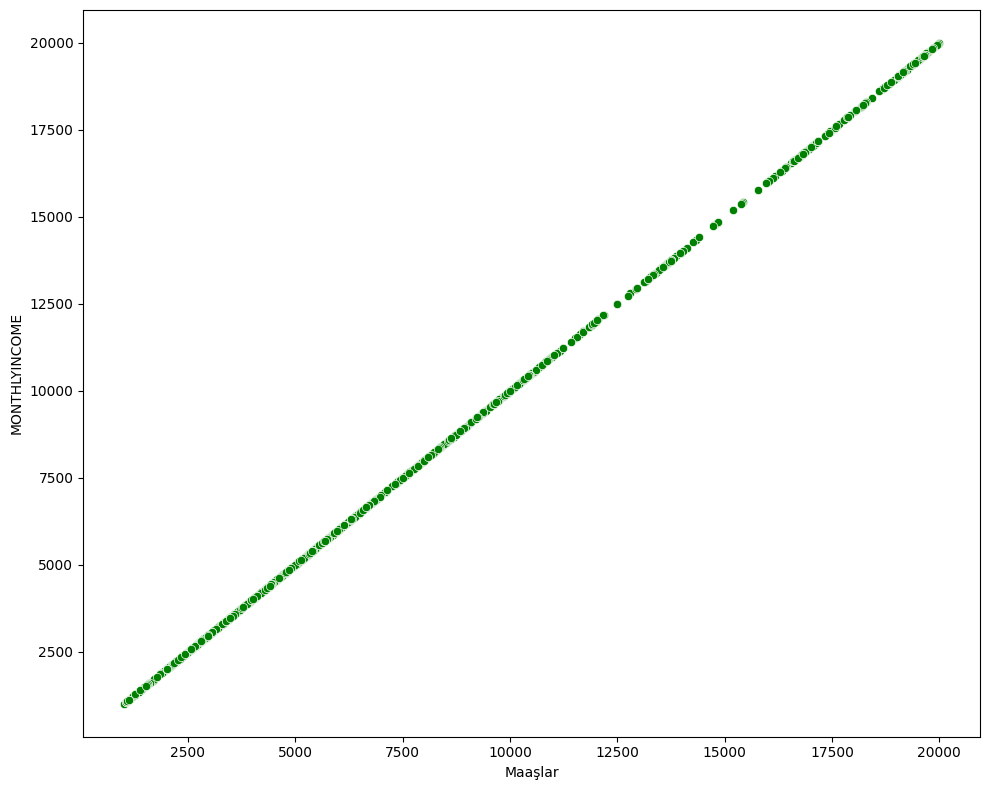

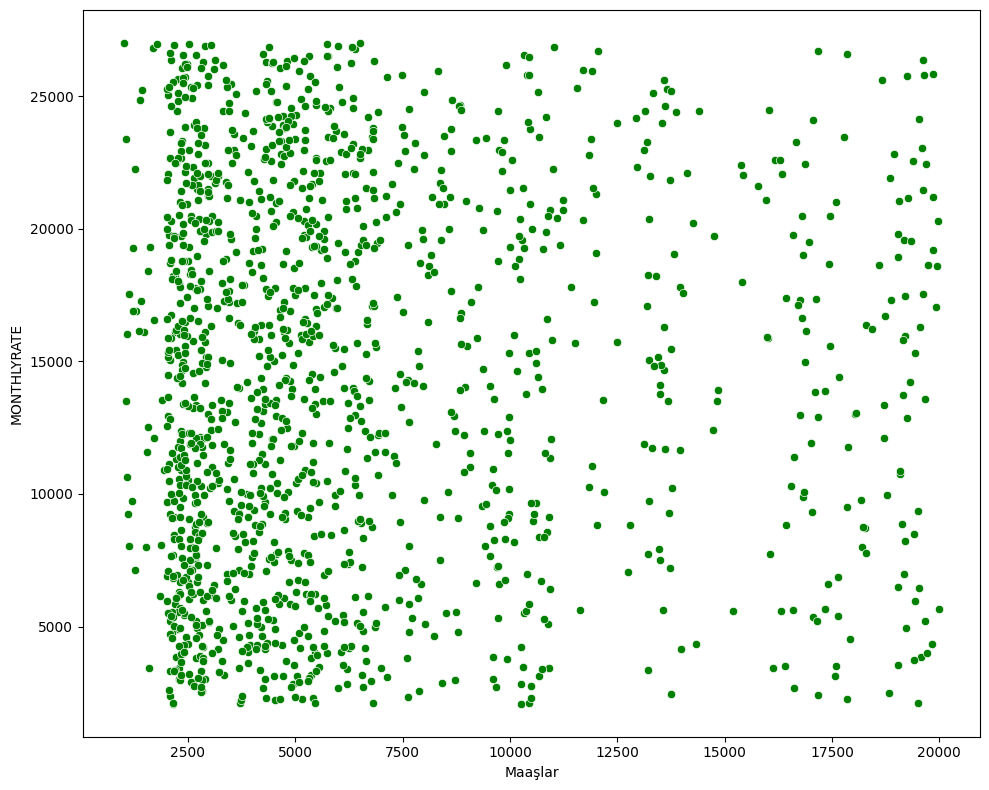

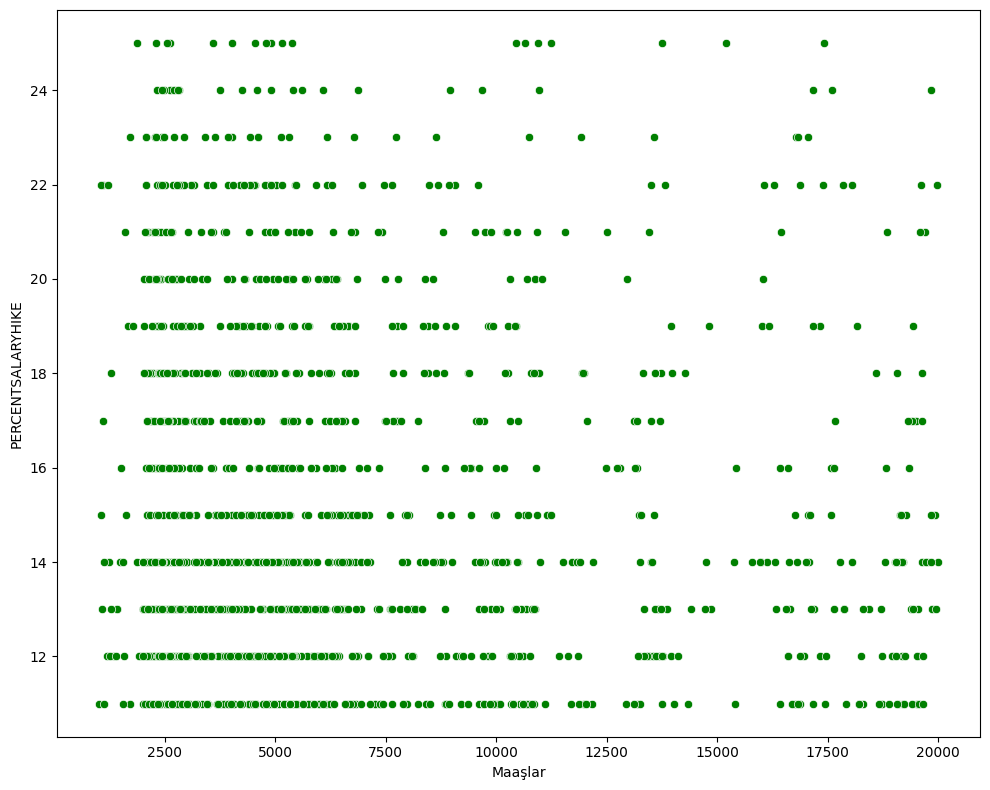

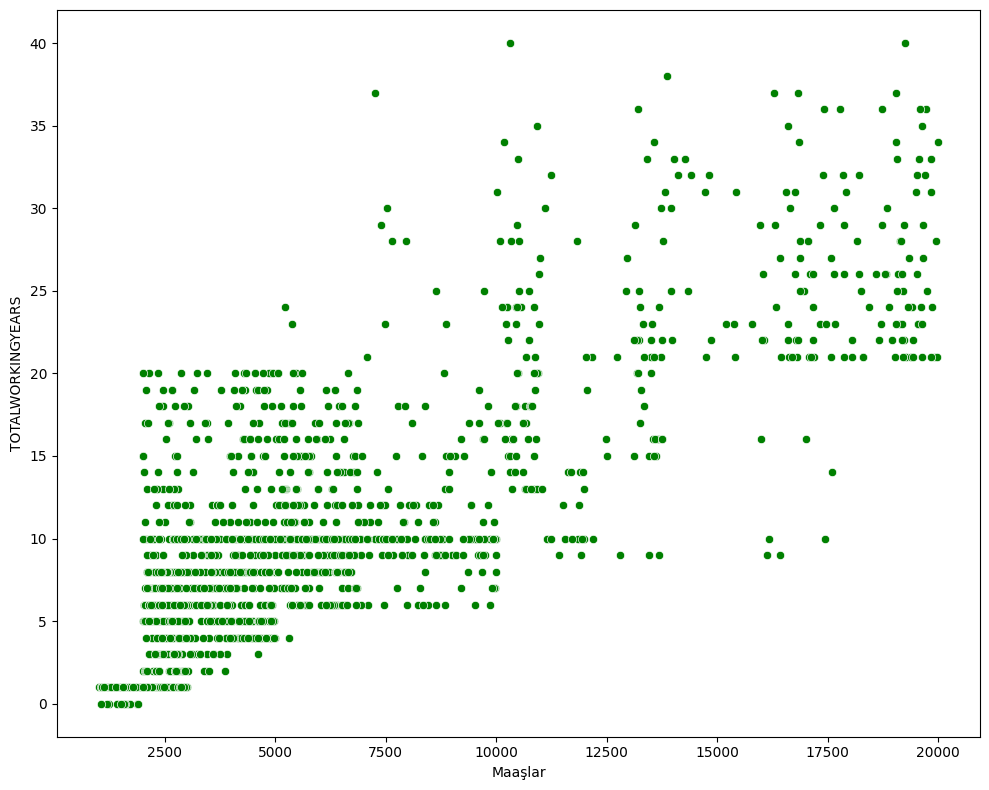

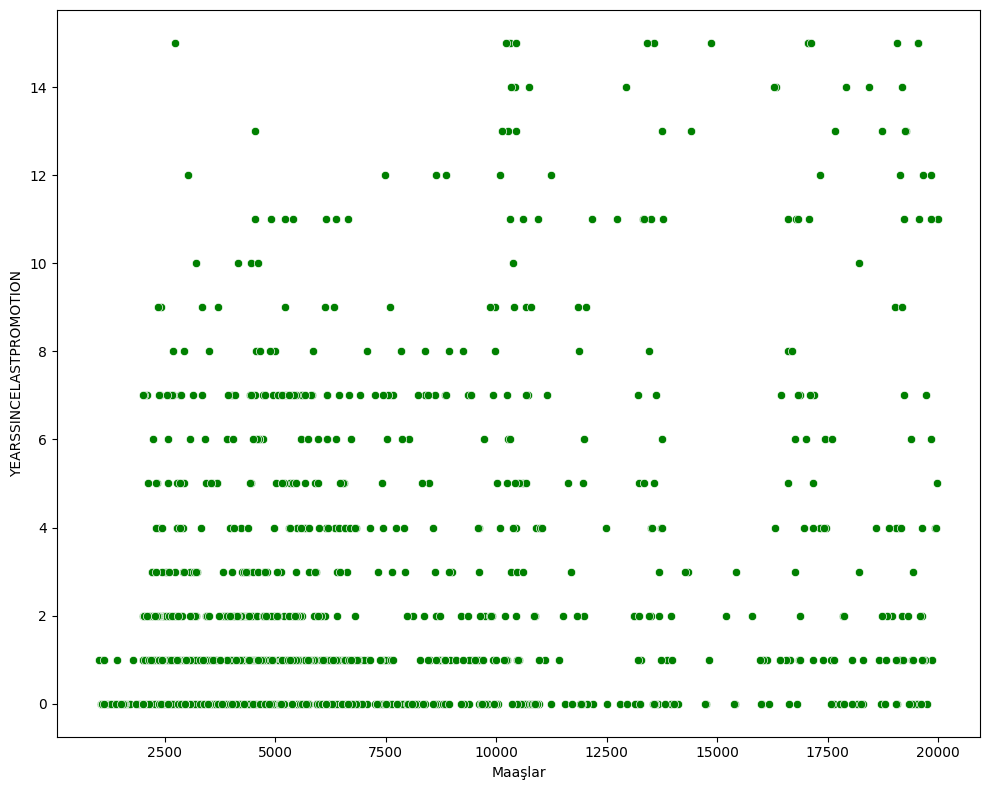

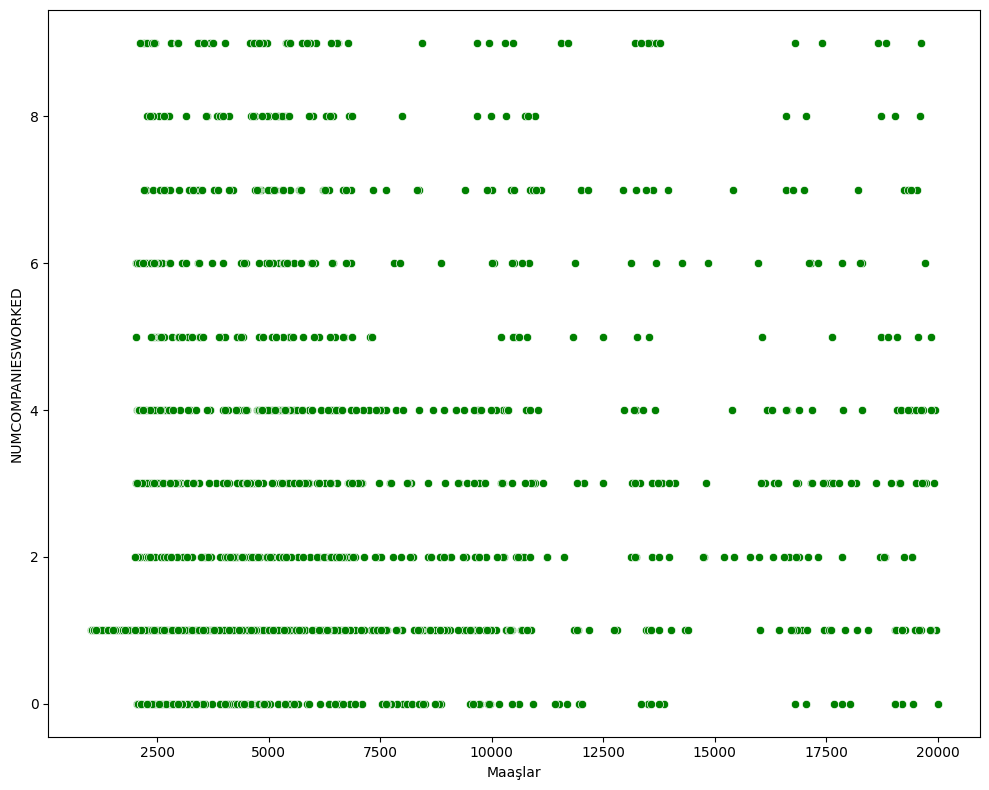

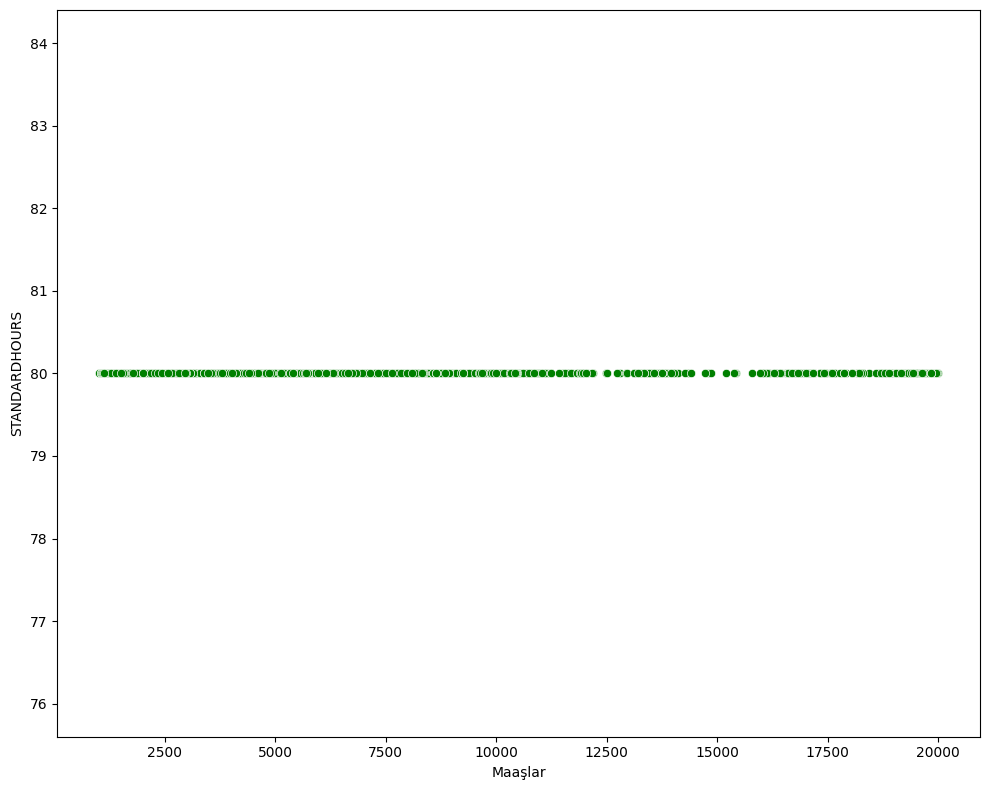

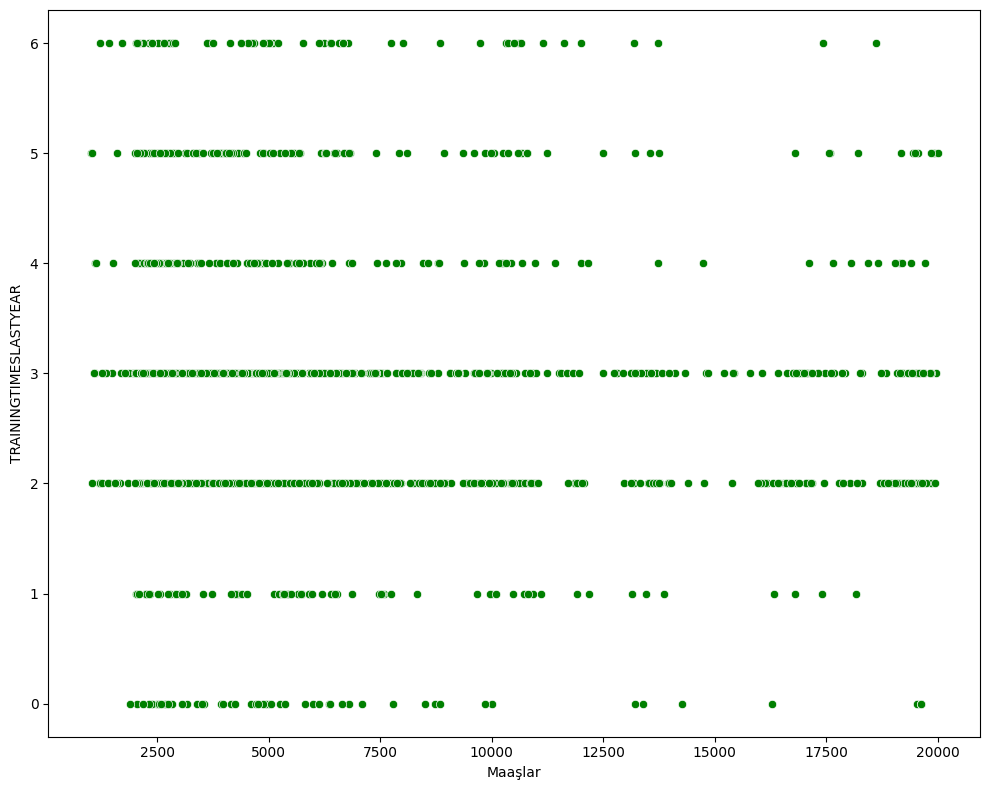

In [21]:
for col in num:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=df,x='MonthlyIncome',y=col,color='green')
    plt.xlabel("Maaşlar")
    plt.ylabel(col.upper())
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


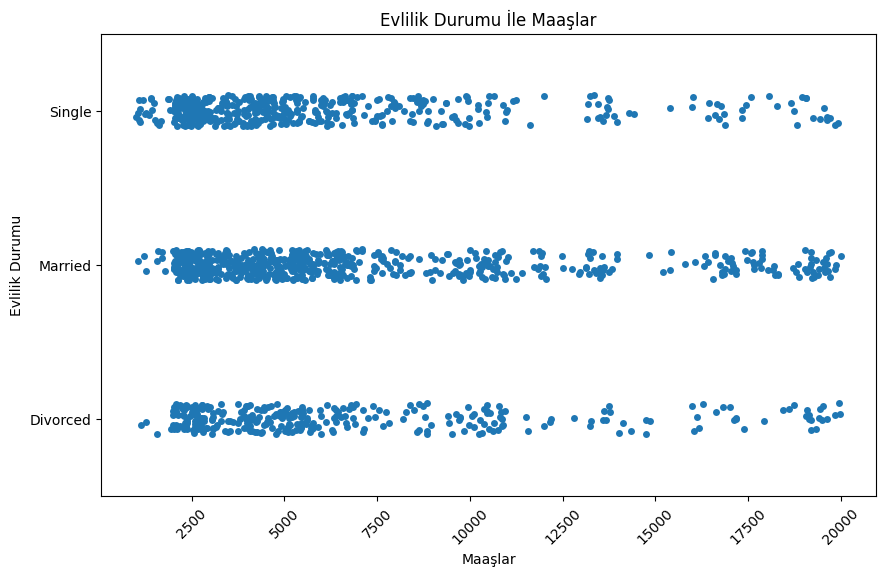

In [22]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='MonthlyIncome', y='MaritalStatus', data=df, jitter=True)
plt.title('Evlilik Durumu İle Maaşlar')
plt.xlabel('Maaşlar')
plt.ylabel('Evlilik Durumu')
plt.xticks(rotation=45)
plt.show()

**AYKIRI DEĞERLERİN BELİRLENMESİ & DEFINITION OF DISTINCTIVE VALUES**

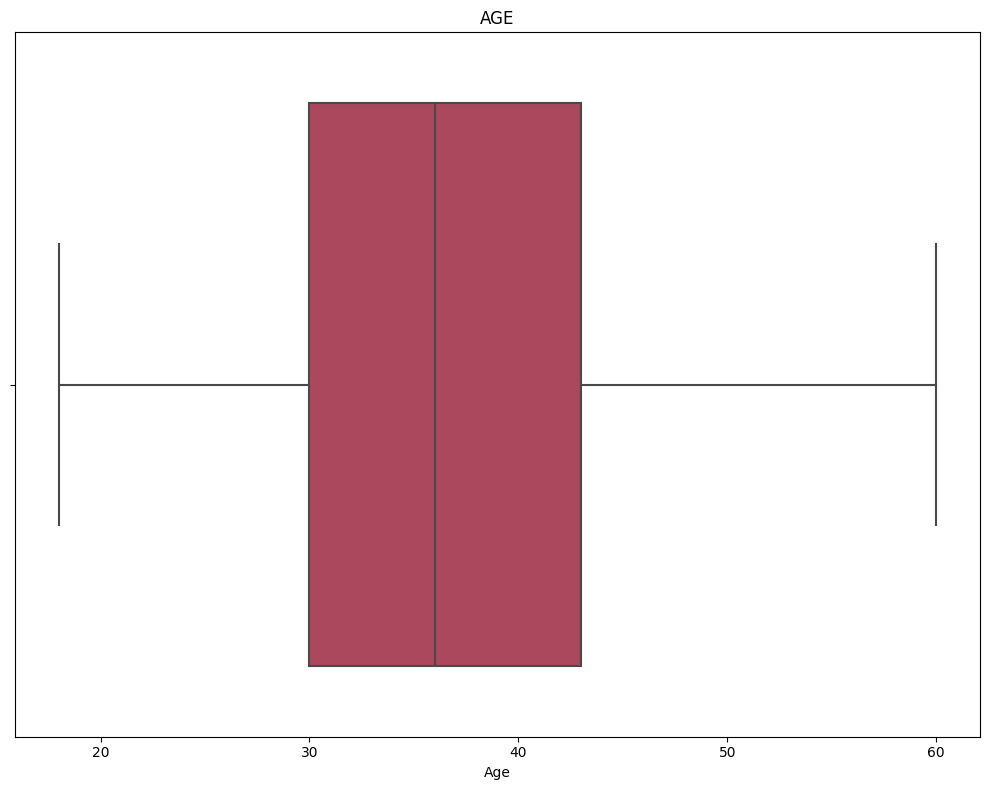

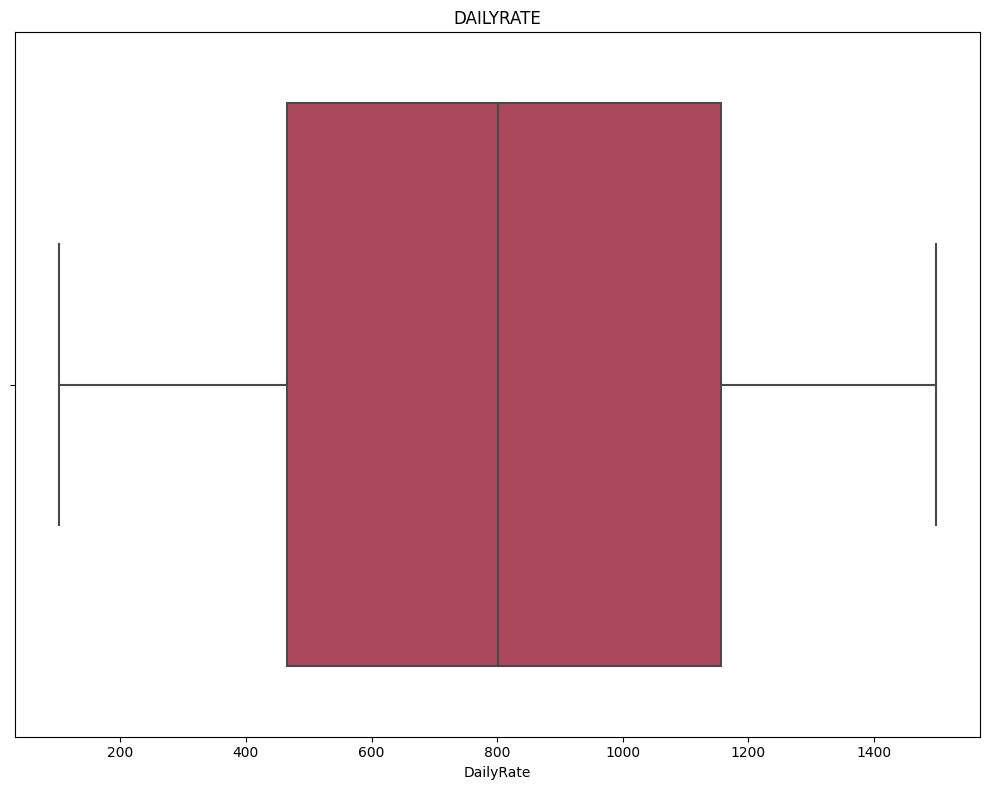

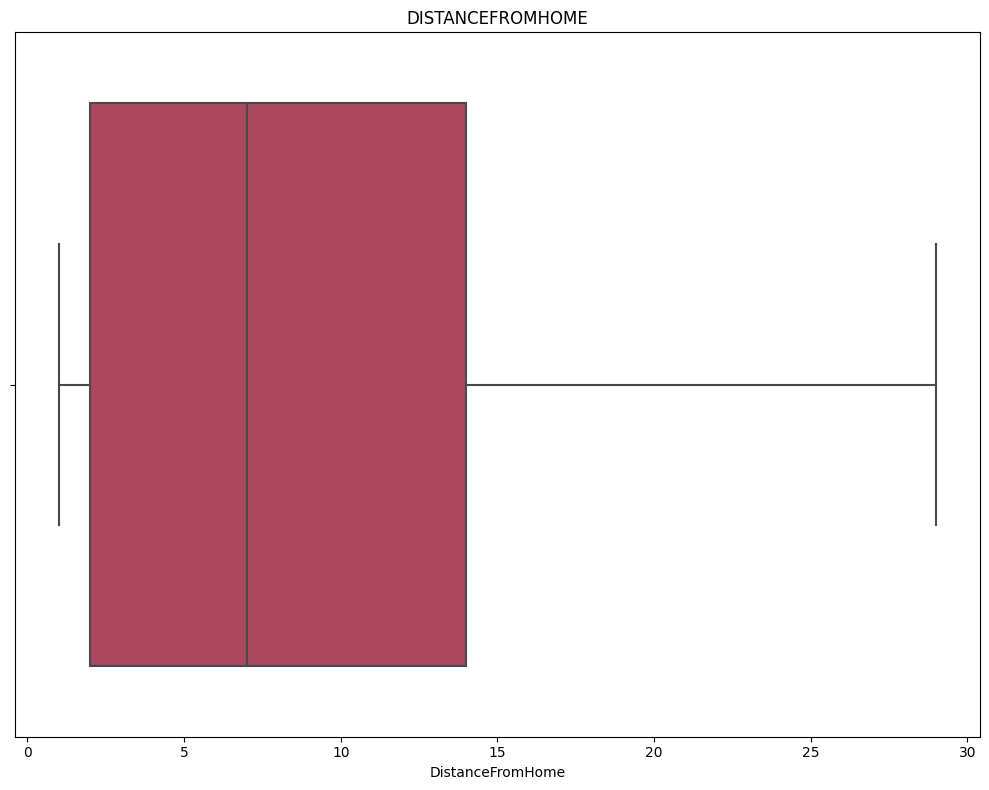

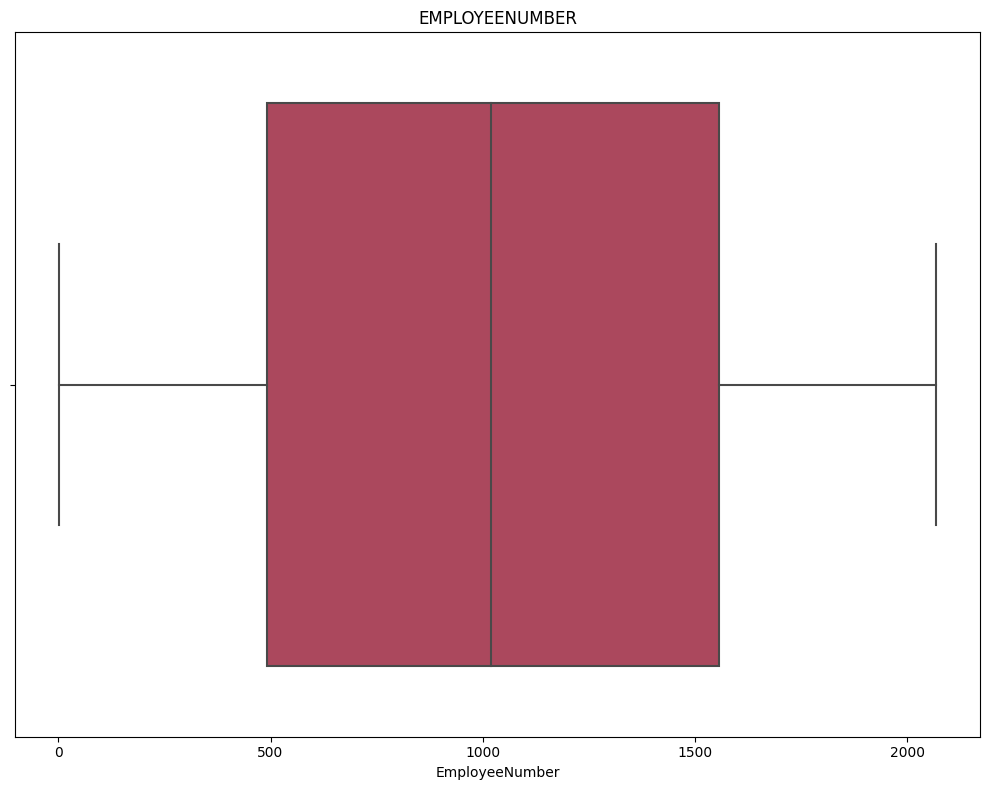

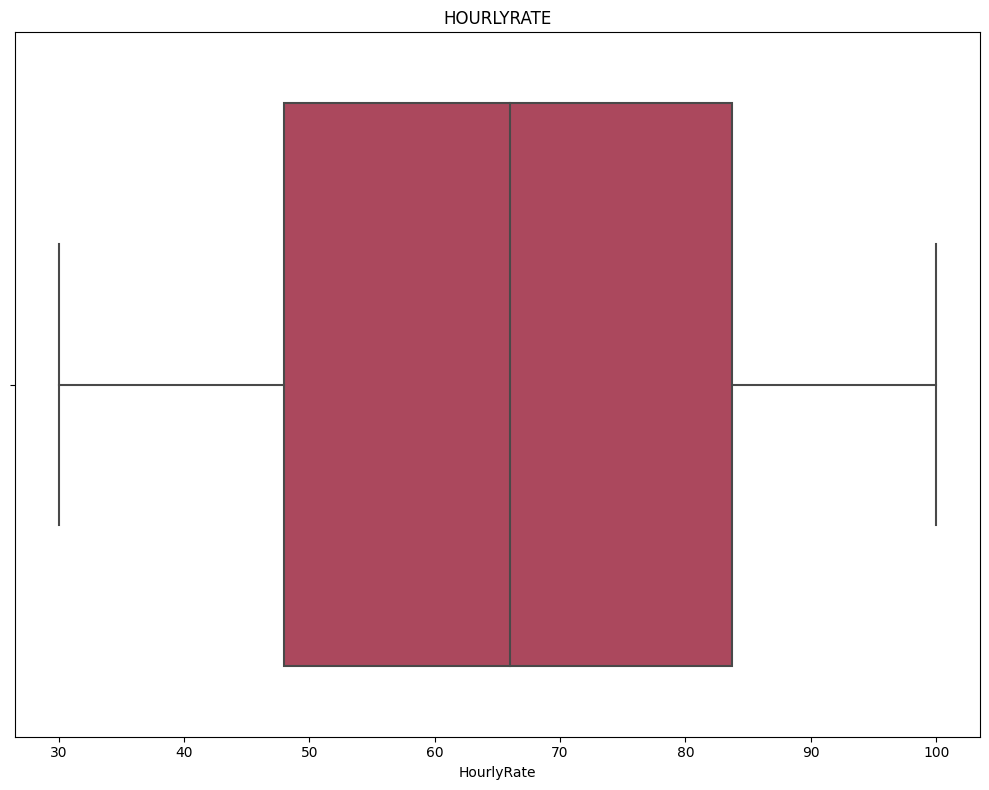

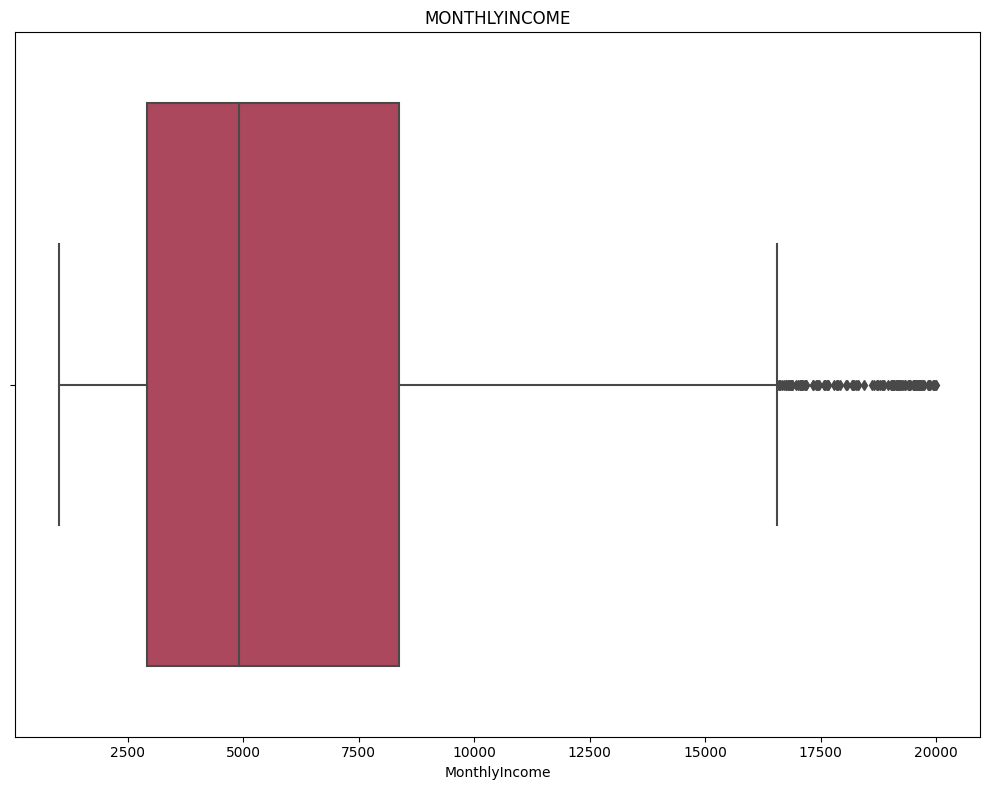

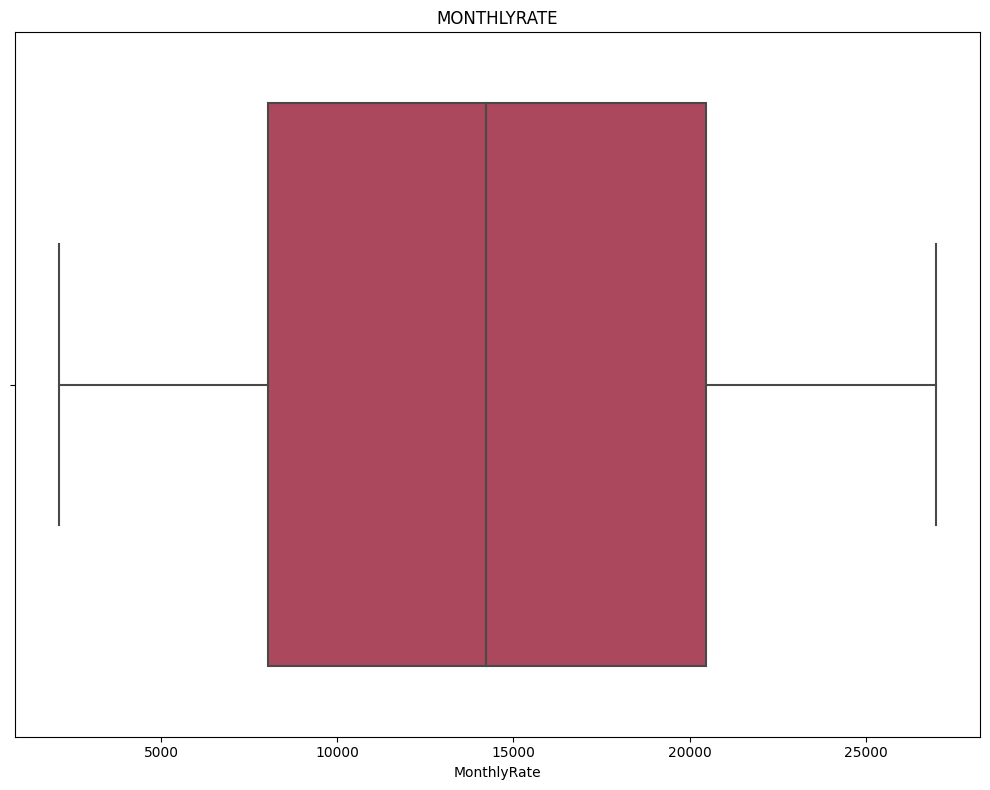

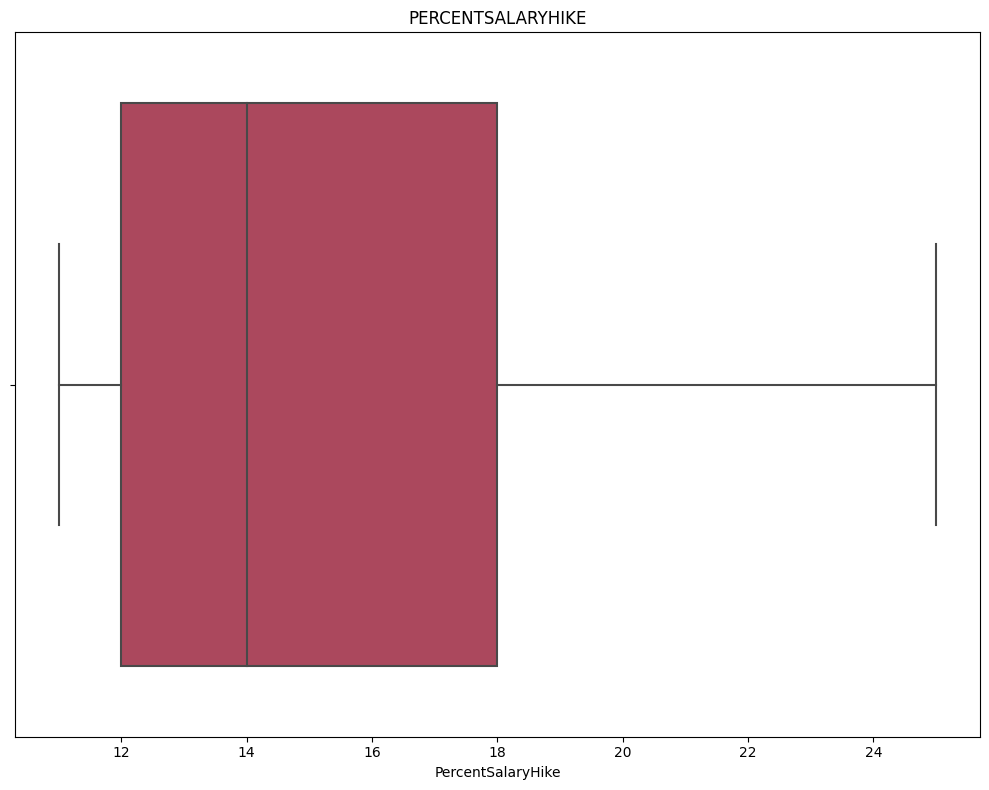

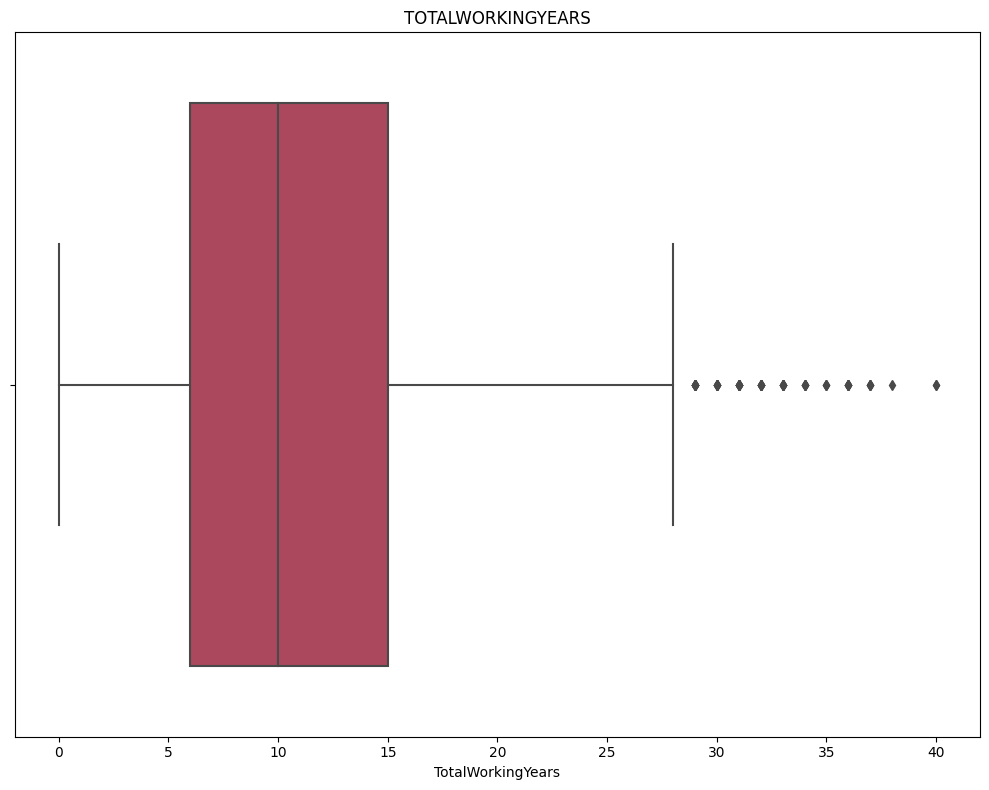

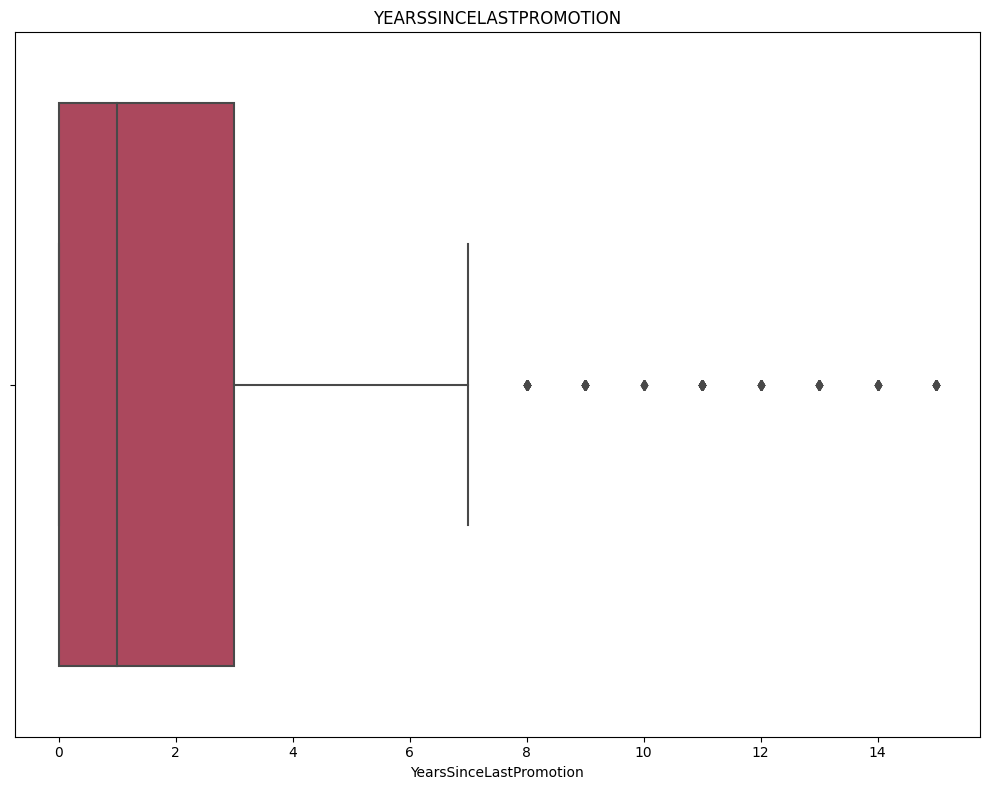

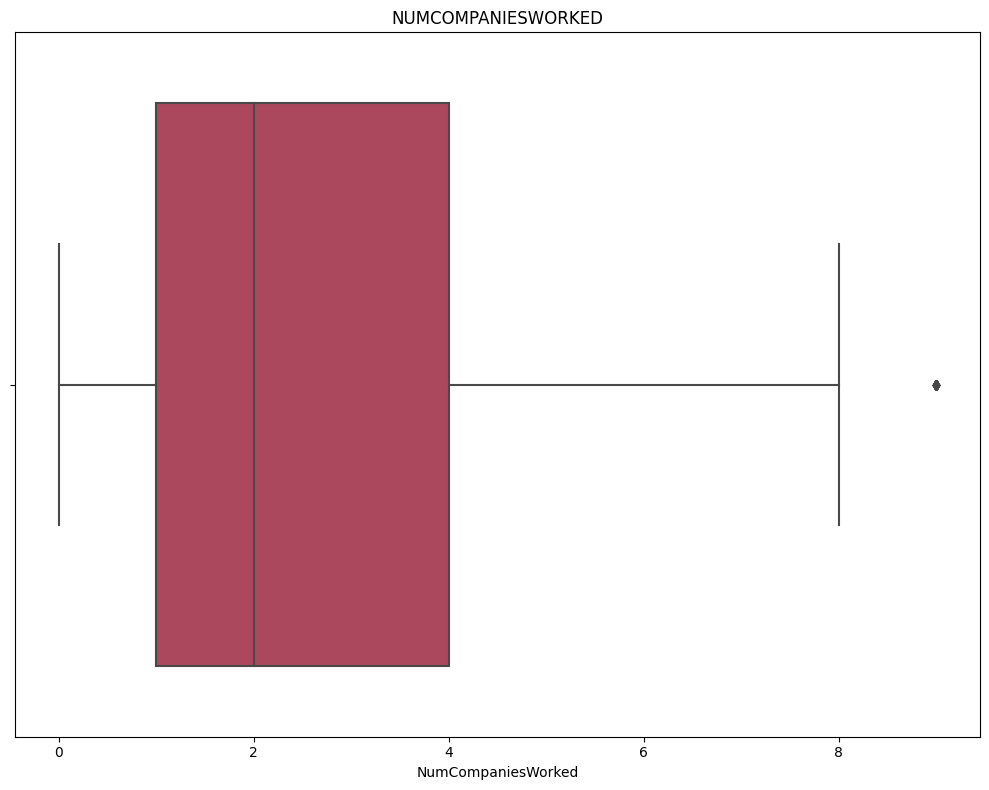

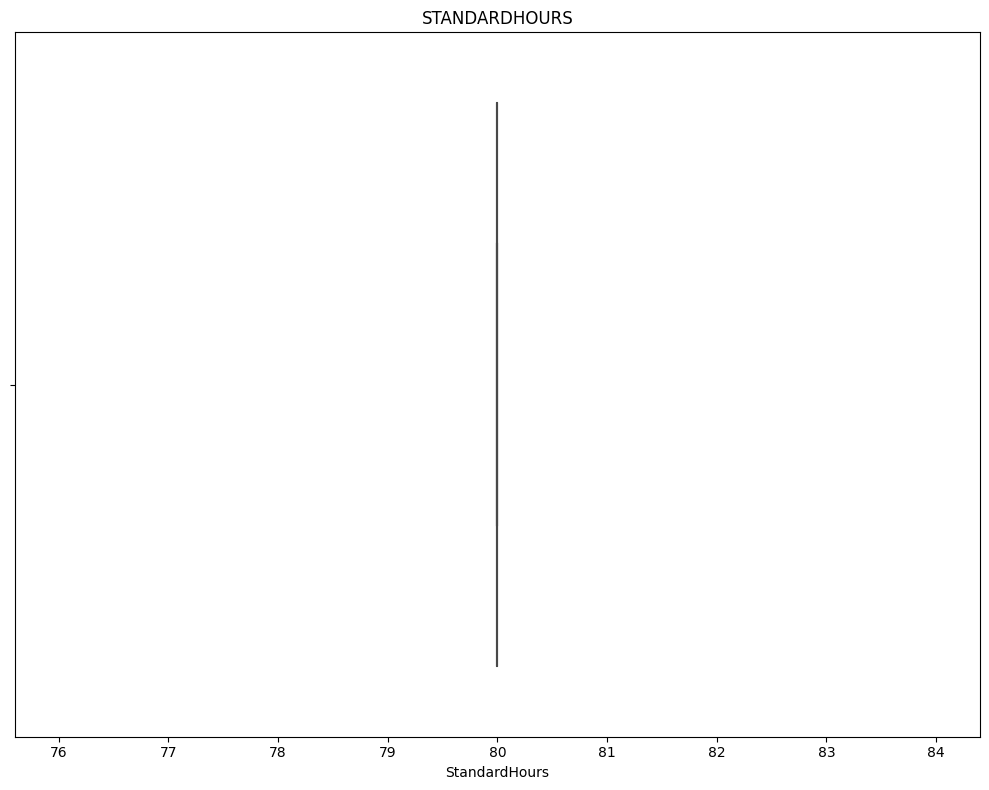

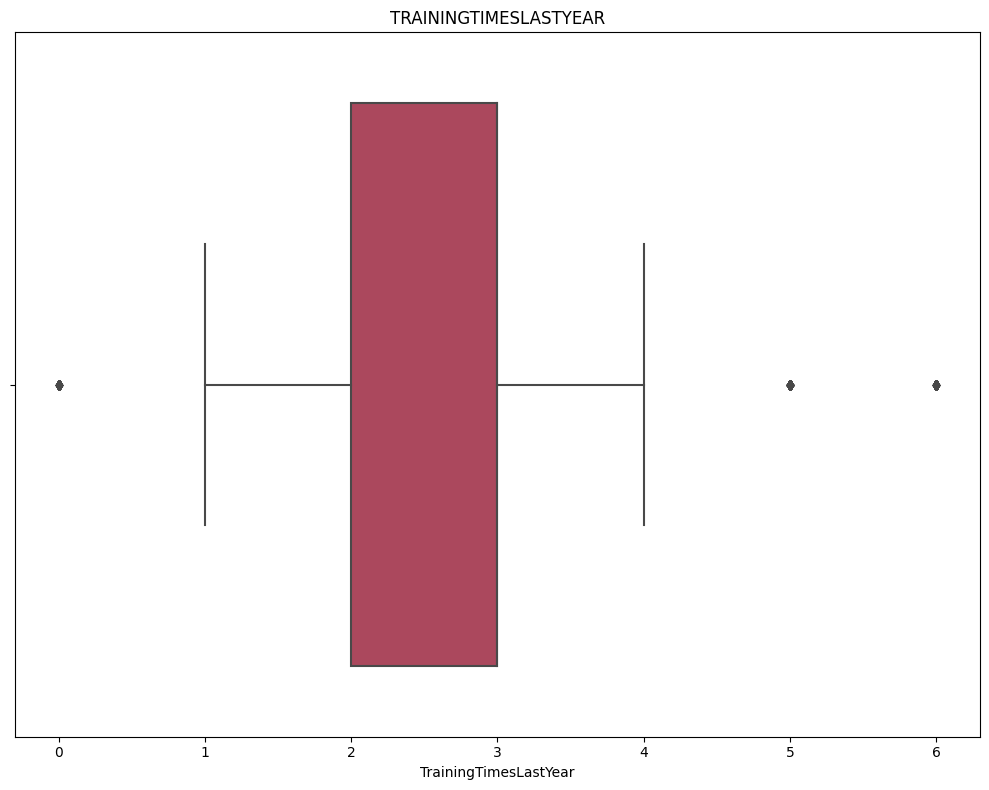

In [23]:
for col in num:
    plt.figure(figsize=(10,8))
    sns.boxplot(data=df,x=col,palette='inferno')
    plt.title(col.upper())
    plt.tight_layout()
    plt.show()
    

**AYKIRI DEĞERLERİ BASKILAMA & SUPPRESSING OUTLIERS**

In [24]:
for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[col]=df[col].clip(lower=lower_bound,upper=upper_bound)    

In [25]:
 outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [26]:
outliers

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

# KEŞİFSEL VERİ ANALİZİ(EDA)

In [27]:
catss=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

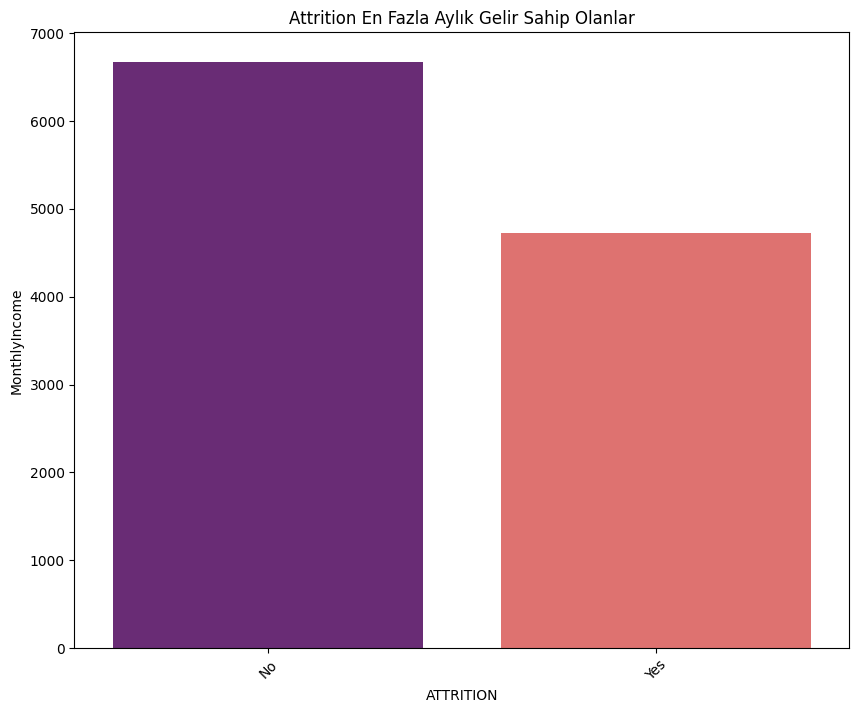

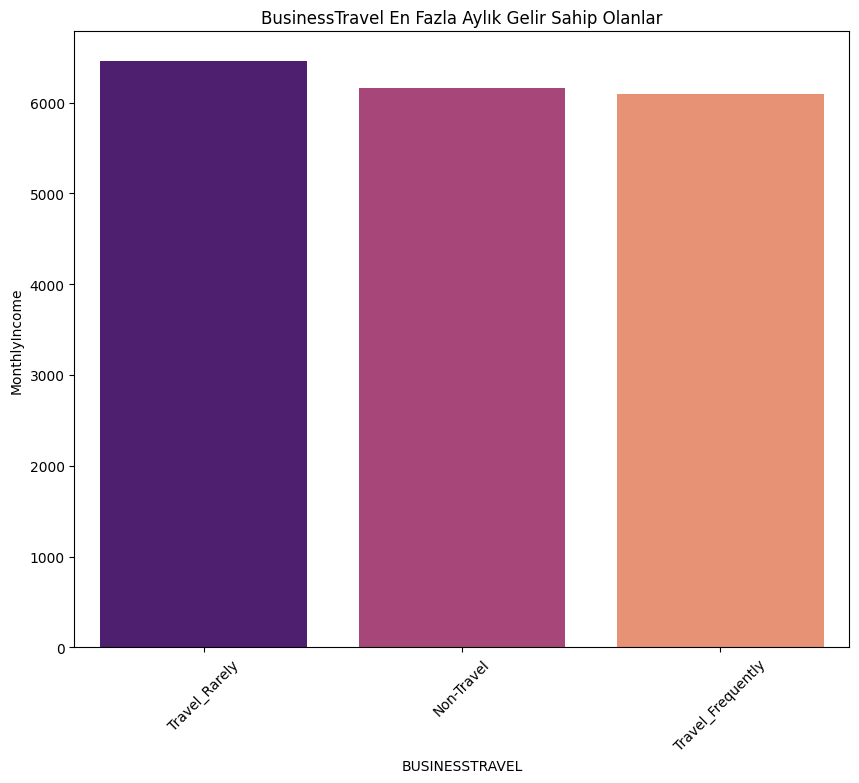

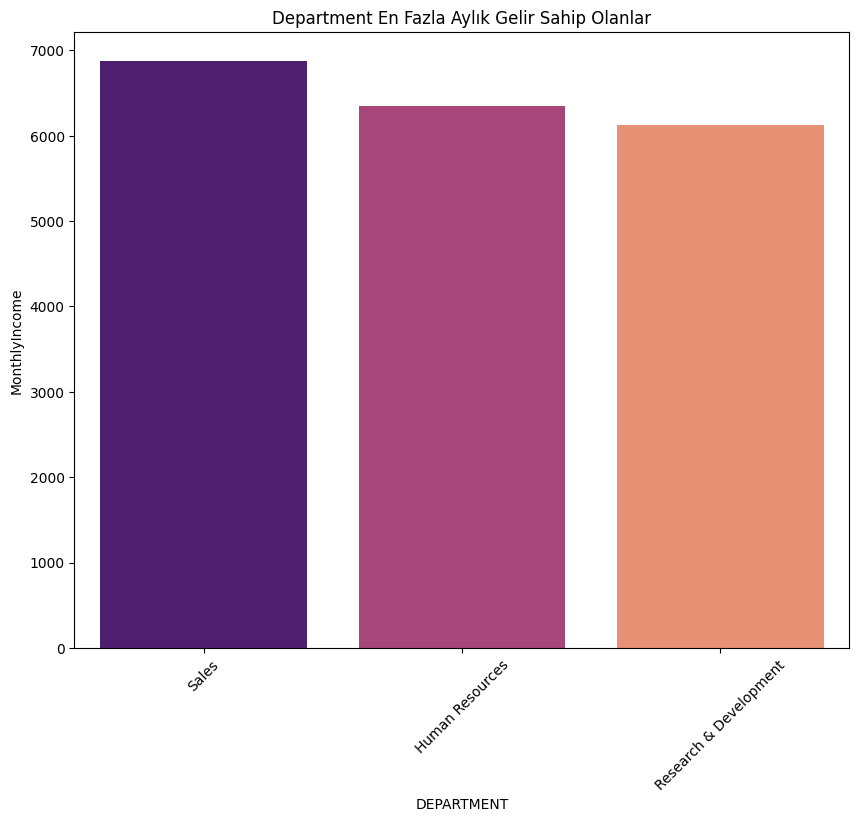

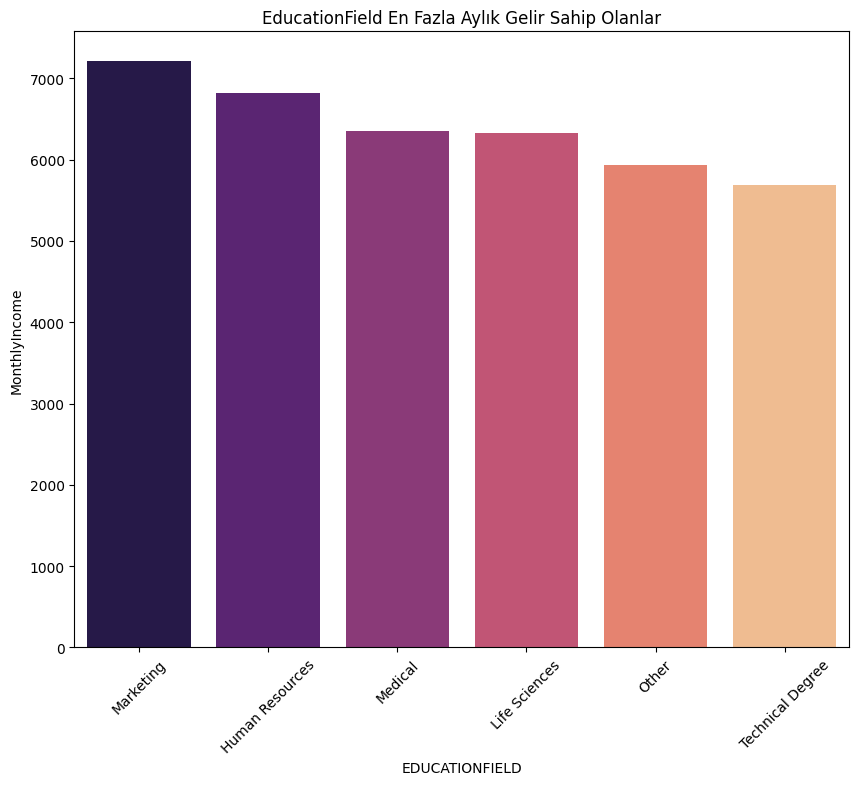

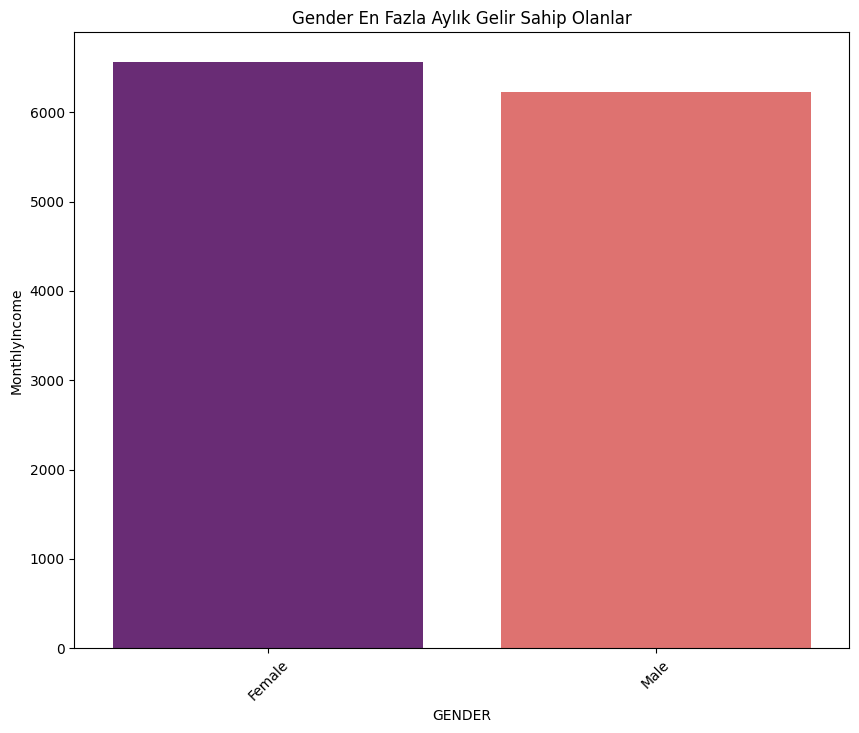

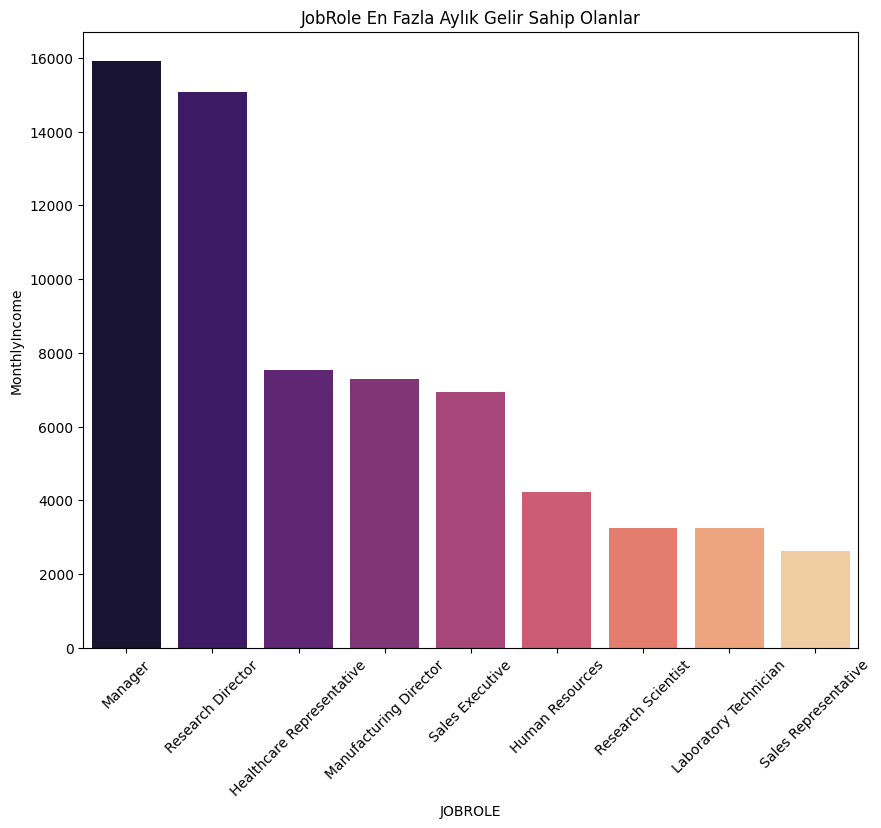

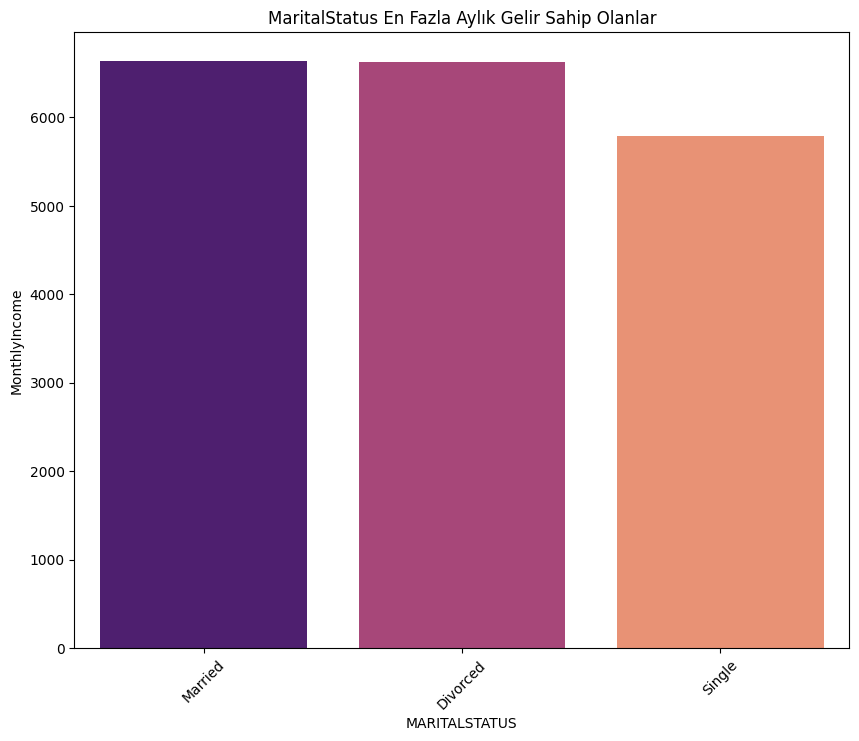

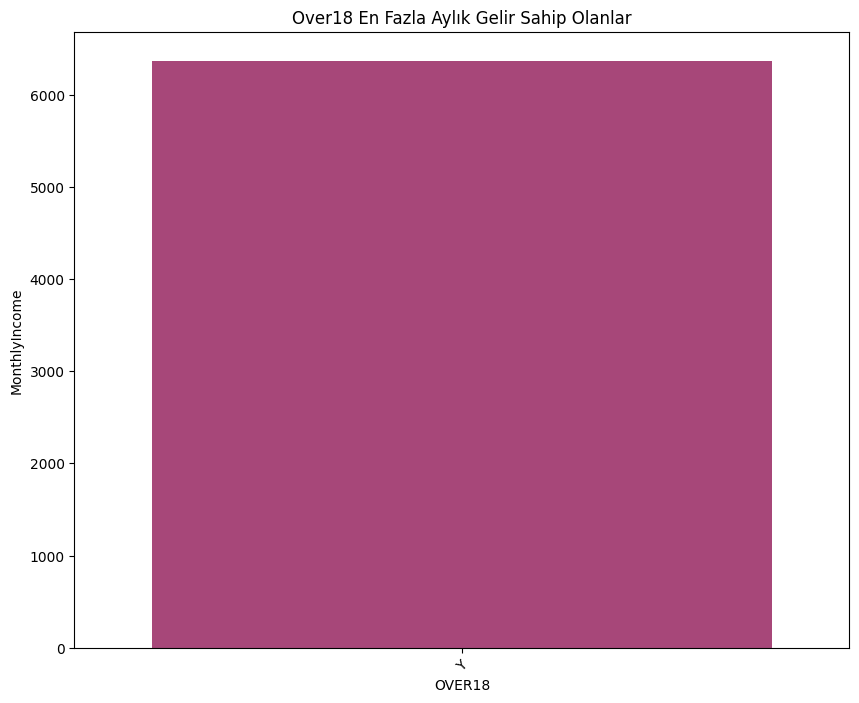

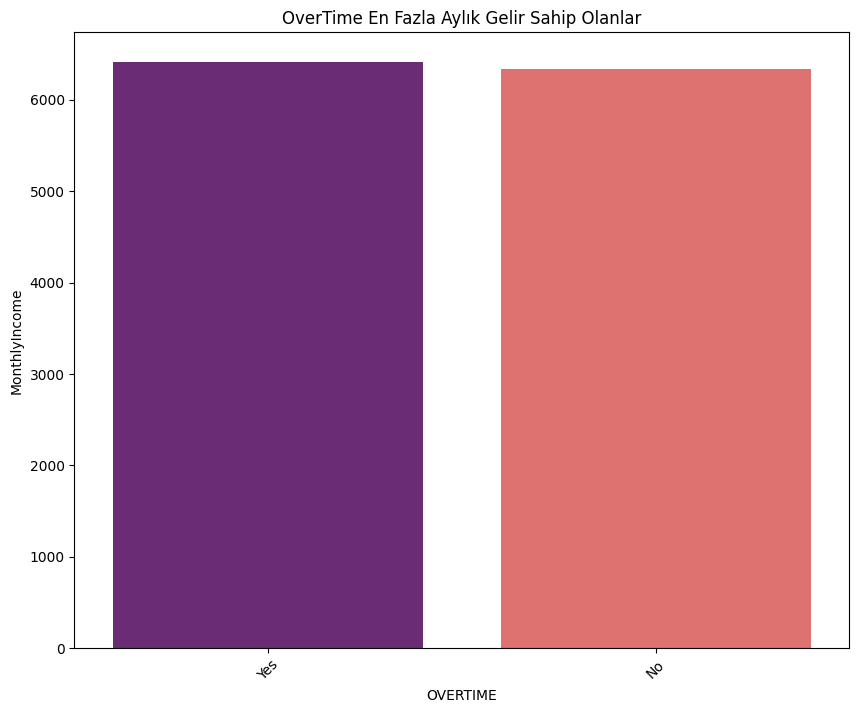

In [28]:
for col in catss:
    kategorik_verilerin_görselleştirilmesi = (
        df.groupby(col,as_index=False)["MonthlyIncome"].mean().sort_values(by="MonthlyIncome",ascending=False).head(10))
    plt.figure(figsize=(10,8))
    sns.barplot(x=col,y="MonthlyIncome",data=kategorik_verilerin_görselleştirilmesi,palette="magma")
    plt.title(f"{col} En Fazla Aylık Gelir Sahip Olanlar")
    plt.xlabel(col.upper())
    plt.xticks(rotation=45)
    plt.ylabel("MonthlyIncome")
    

**Çalışanın Eviyle İşi Arasındaki Uzaklık ile Çalışanın İşten Ayrılma Durumu**






**Distance Between the Employee's Home and Workplace and Employee's Leaving Work**

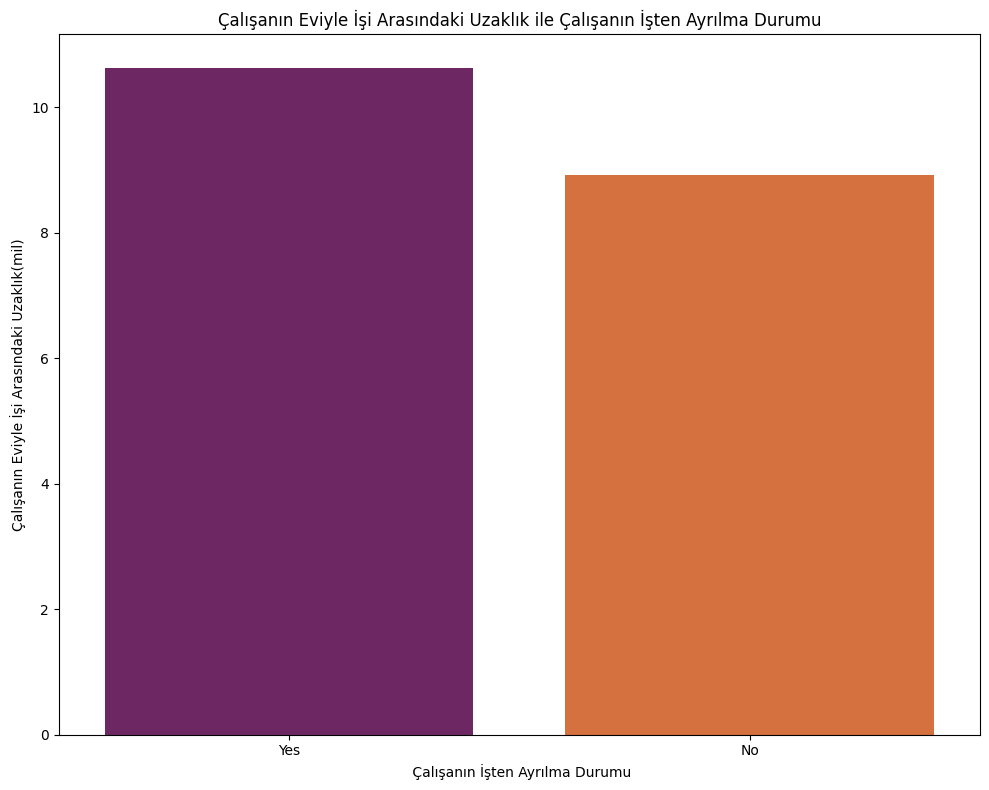

In [29]:
çalışanın_ayrılma_durumu_ev=df.groupby(["Attrition"],as_index=False)["DistanceFromHome"].mean().sort_values(by="DistanceFromHome",ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x='Attrition',y='DistanceFromHome',data=çalışanın_ayrılma_durumu_ev,palette='inferno')
plt.title("Çalışanın Eviyle İşi Arasındaki Uzaklık ile Çalışanın İşten Ayrılma Durumu")
plt.xlabel(" Çalışanın İşten Ayrılma Durumu")
plt.ylabel("Çalışanın Eviyle İşi Arasındaki Uzaklık(mil)")
plt.tight_layout()
plt.show()

**Mesleklere Göre:ToplamÇalışmaYılları,SonTerfidenBu YanaYıllar,ÇalışılanŞirketSayısı**



**By Professions: Total Working Years, Years Since Last Promotion, Number of Companies Worked For**





In [30]:
numss=['TotalWorkingYears','YearsSinceLastPromotion','NumCompaniesWorked']

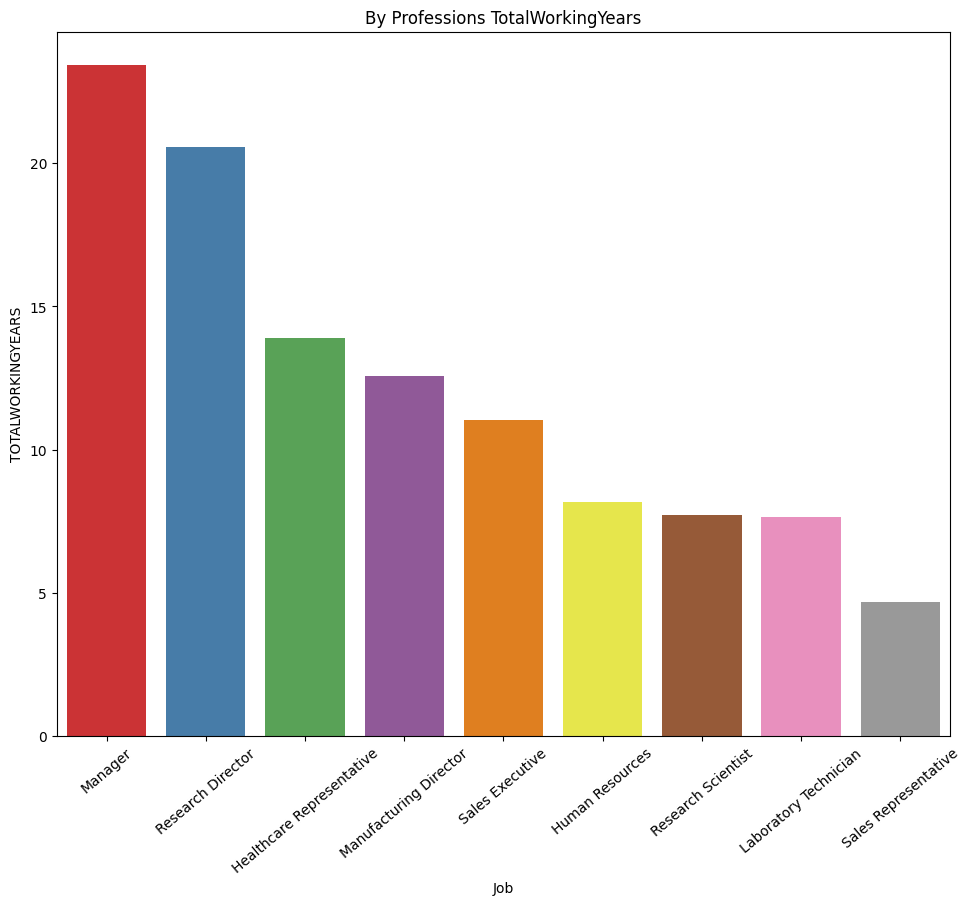

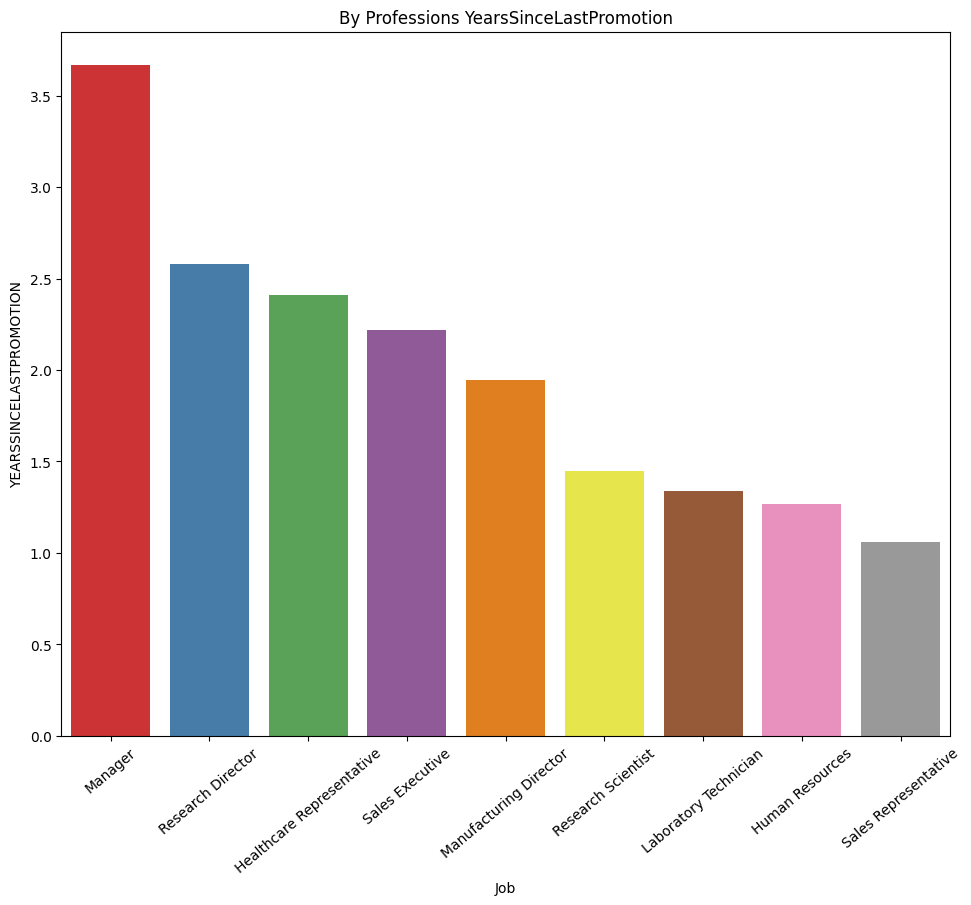

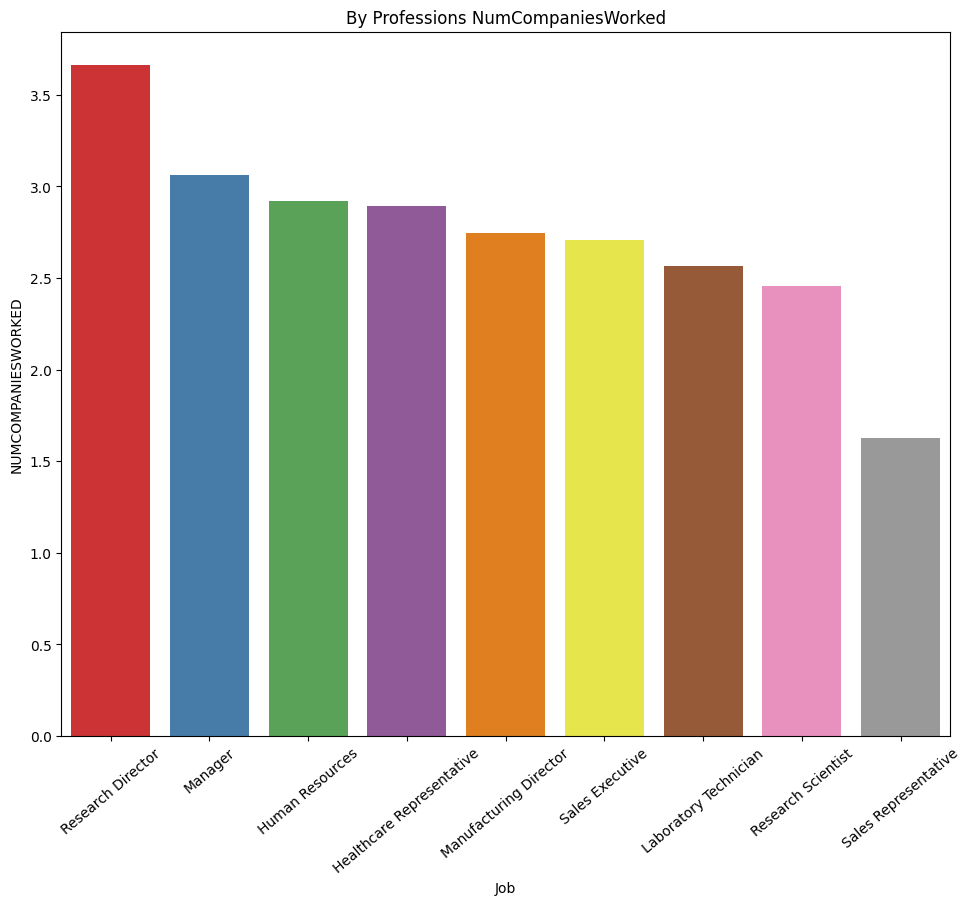

In [31]:
for col in numss:
    mesleklere_göre_analiz=df.groupby(["JobRole"],as_index=False)[col].mean().sort_values(by=[col],ascending=False).head(10)
    plt.figure(figsize=(10,8))
    sns.barplot(x="JobRole",y=col,data=mesleklere_göre_analiz,palette='Set1')
    plt.title(f"By Professions {col}")
    plt.xlabel("Job")
    plt.ylabel(col.upper())
    plt.tight_layout()
    plt.xticks(rotation=(40))
    plt.show()


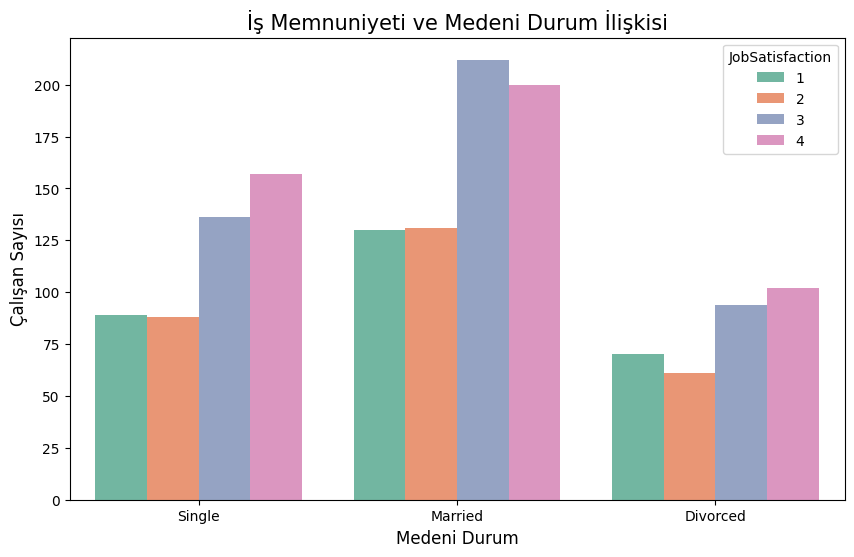

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='MaritalStatus', hue='JobSatisfaction', data=df, palette='Set2')
plt.title('İş Memnuniyeti ve Medeni Durum İlişkisi', fontsize=15)
plt.xlabel('Medeni Durum', fontsize=12)
plt.ylabel('Çalışan Sayısı', fontsize=12)
plt.show()


<ipython-input-33-1afec974b9ab>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Age', y='MonthlyIncome', data=df, palette='coolwarm')


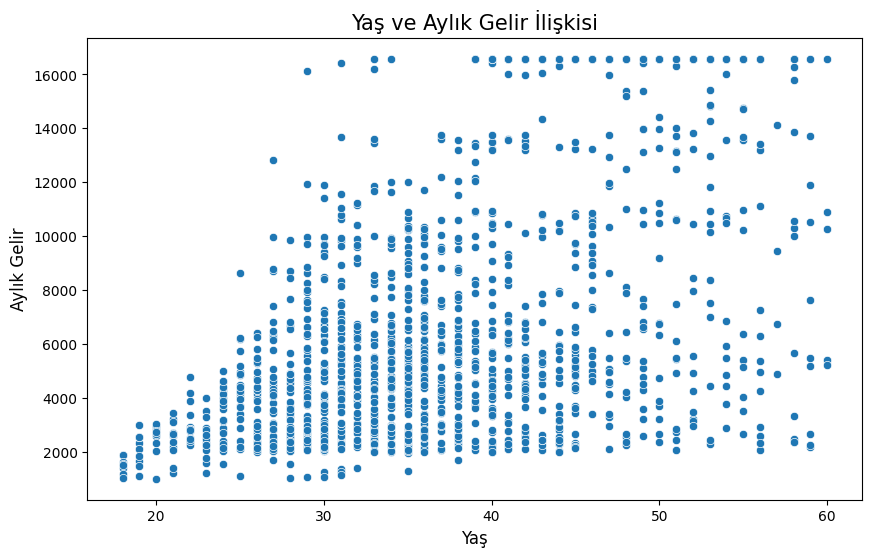

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='MonthlyIncome', data=df, palette='coolwarm')
plt.title('Yaş ve Aylık Gelir İlişkisi', fontsize=15)
plt.xlabel('Yaş', fontsize=12)
plt.ylabel('Aylık Gelir', fontsize=12)
plt.show()


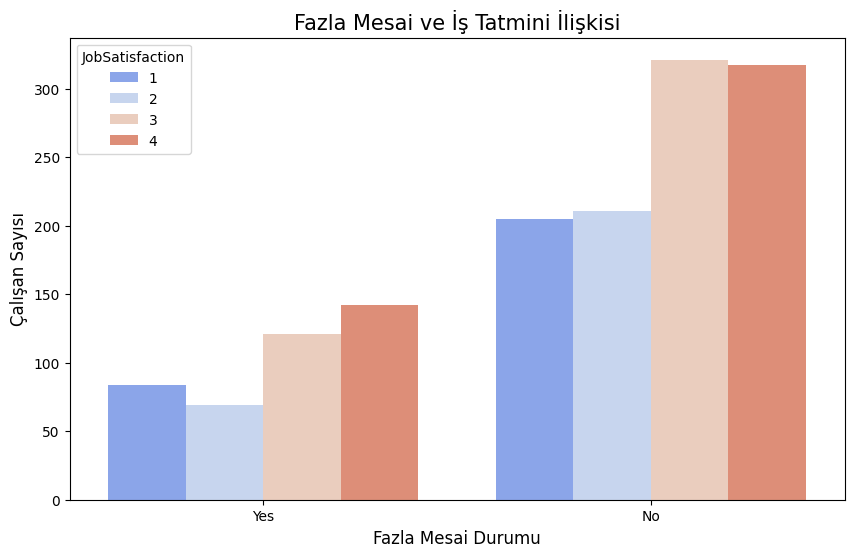

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='OverTime', hue='JobSatisfaction', data=df, palette='coolwarm')
plt.title('Fazla Mesai ve İş Tatmini İlişkisi', fontsize=15)
plt.xlabel('Fazla Mesai Durumu', fontsize=12)
plt.ylabel('Çalışan Sayısı', fontsize=12)
plt.show()


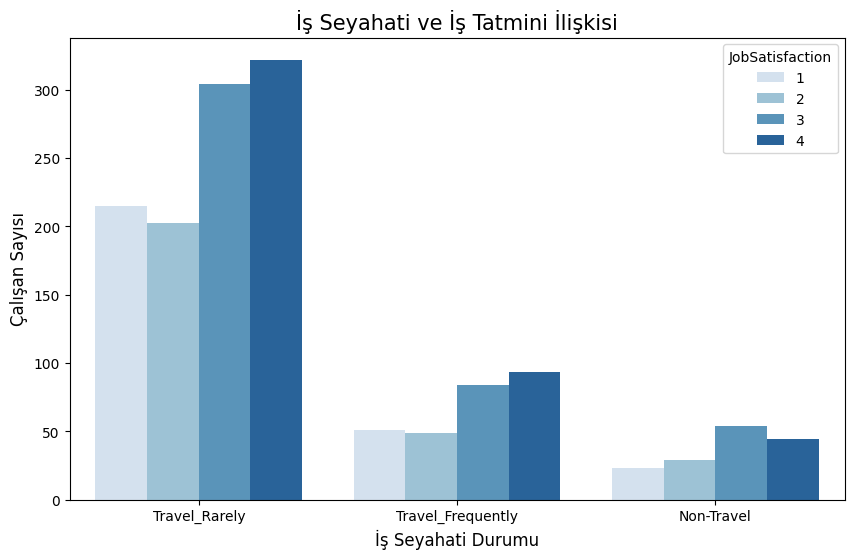

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='BusinessTravel', hue='JobSatisfaction', data=df, palette='Blues')
plt.title('İş Seyahati ve İş Tatmini İlişkisi', fontsize=15)
plt.xlabel('İş Seyahati Durumu', fontsize=12)
plt.ylabel('Çalışan Sayısı', fontsize=12)
plt.show()


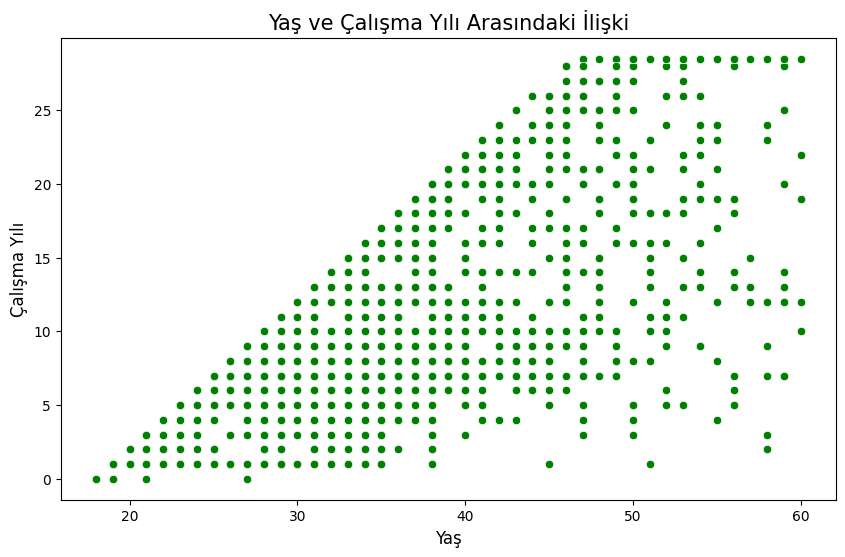

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='TotalWorkingYears', data=df, color='green')
plt.title('Yaş ve Çalışma Yılı Arasındaki İlişki', fontsize=15)
plt.xlabel('Yaş', fontsize=12)
plt.ylabel('Çalışma Yılı', fontsize=12)
plt.show()



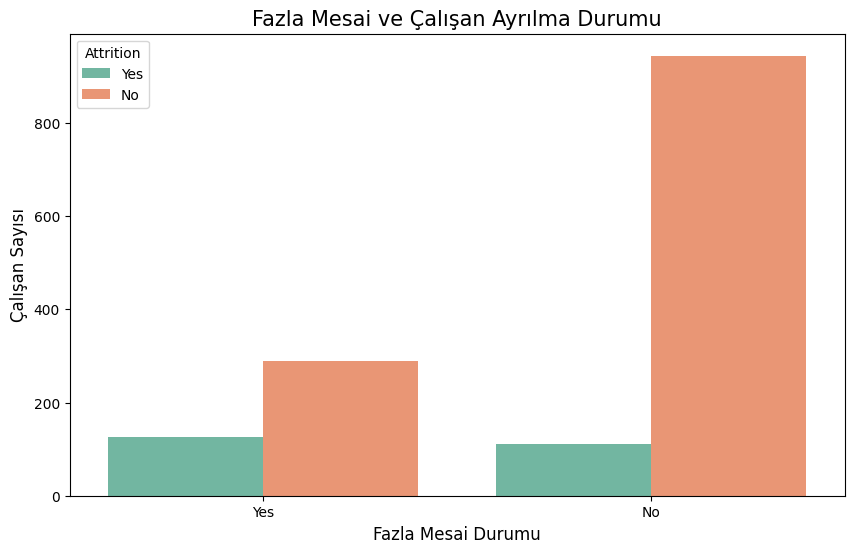

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='Set2')
plt.title('Fazla Mesai ve Çalışan Ayrılma Durumu', fontsize=15)
plt.xlabel('Fazla Mesai Durumu', fontsize=12)
plt.ylabel('Çalışan Sayısı', fontsize=12)
plt.show()


In [38]:
df[cat]

Attrition     BusinessTravel              Department EducationField  \
0          Yes      Travel_Rarely                   Sales  Life Sciences   
1           No  Travel_Frequently  Research & Development  Life Sciences   
2          Yes      Travel_Rarely  Research & Development          Other   
3           No  Travel_Frequently  Research & Development  Life Sciences   
4           No      Travel_Rarely  Research & Development        Medical   
...        ...                ...                     ...            ...   
1465        No  Travel_Frequently  Research & Development        Medical   
1466        No      Travel_Rarely  Research & Development        Medical   
1467        No      Travel_Rarely  Research & Development  Life Sciences   
1468        No  Travel_Frequently                   Sales        Medical   
1469        No      Travel_Rarely  Research & Development        Medical   

      Gender                    JobRole MaritalStatus Over18 OverTime  \
0     Female            Sales Executive        Single      Y      Yes   
1       Male         Research Scientist       Married      Y       No   
2       Male      Laboratory Technician        Single      Y      Yes   
3     Female         Research Scientist       Married      Y      Yes   
4       Male      Laboratory Technician       Married      Y       No   
...      ...                        ...           ...    ...      ...   
1465    Male      Laboratory Technician       Married      Y       No   
1466    Male  Healthcare Representative       Married      Y       No   
1467    Male     Manufacturing Director       Married      Y      Yes   
1468    Male            Sales Executive       Married      Y       No   
1469    Male      Laboratory Technician       Married      Y       No   

      Education  EmployeeCount  EnvironmentSatisfaction  JobInvolvement  \
0             2              1                        2               3   
1             1              1                        3               2   
2             2              1                        4               2   
3             4              1                        4               3   
4             1              1                        1               3   
...         ...            ...                      ...             ...   
1465          2              1                        3               4   
1466          1              1                        4               2   
1467          3              1                        2               4   
1468          3              1                        4               2   
1469          3              1                        2               4   

      JobLevel  JobSatisfaction  PerformanceRating  RelationshipSatisfaction  \
0            2                4                  3                         1   
1            2                2                  4                         4   
2            1                3                  3                         2   
3            1                3                  3                         3   
4            1                2                  3                         4   
...        ...              ...                ...                       ...   
1465         2                4                  3                         3   
1466         3                1                  3                         1   
1467         2                2                  4                         2   
1468         2                2                  3                         4   
1469         2                3                  3                         1   

      StockOptionLevel  WorkLifeBalance  
0                    0                1  
1                    1                3  
2                    0                3  
3                    0                3  
4                    1                3  
...                ...              ...  
1465                 1                3  
1466             

**ENCODİG İŞLEMİ**


**KATEGORİK VERİLERİ NÜMERİK HALE GETİRME**



**NUMERIZING CATEGORICAL DATA**

In [39]:

label_encoder = LabelEncoder()

for col in cat:
    df[col] = label_encoder.fit_transform(df[col])

df[cat].head()

Attrition  BusinessTravel  Department  EducationField  Gender  JobRole  \
0          1               2           2               1       0        7   
1          0               1           1               1       1        6   
2          1               2           1               4       1        2   
3          0               1           1               1       0        6   
4          0               2           1               3       1        2   

   MaritalStatus  Over18  OverTime  Education  EmployeeCount  \
0              2       0         1          1              0   
1              1       0         0          0              0   
2              2       0         1          1              0   
3              1       0         1          3              0   
4              1       0         0          0              0   

   EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                        1               2         1                3   
1                        2               1         1                1   
2                        3               1         0                2   
3                        3               2         0                2   
4                        0               2         0                1   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  0                         0                 0   
1                  1                         3                 1   
2                  0                         1                 0   
3                  0                         2                 0   
4                  0                         3                 1   

   WorkLifeBalance  
0                0  
1                2  
2                2  
3                2  
4                2

**StandardScaler**


**NÜMERİK VERİLERİ STANDARTLAŞTIRMA**

**STANDARDIZATION OF NUMERICAL DATA**


In [40]:
scaler=StandardScaler()
df[num]=scaler.fit_transform(df[num])

In [41]:
df[num].head()

Age  DailyRate  DistanceFromHome  EmployeeNumber  HourlyRate  \
0  0.446350   0.742527         -1.010909       -1.701283    1.383138   
1  1.322365  -1.297775         -0.147150       -1.699621   -0.240677   
2  0.008343   1.414363         -0.887515       -1.696298    1.284725   
3 -0.429664   1.461466         -0.764121       -1.694636   -0.486709   
4 -1.086676  -0.524295         -0.887515       -1.691313   -1.274014   

   MonthlyIncome  MonthlyRate  PercentSalaryHike  TotalWorkingYears  \
0      -0.084766     0.726020          -1.150554          -0.424999   
1      -0.283072     1.488876           2.129306          -0.151076   
2      -0.981623    -1.674841          -0.057267          -0.561960   
3      -0.793428     1.243211          -1.150554          -0.424999   
4      -0.664977     0.325900          -0.877232          -0.698921   

   YearsSinceLastPromotion  NumCompaniesWorked  StandardHours  \
0                -0.776139            2.169877            0.0   
1                -0.372486           -0.682817            0.0   
2                -0.776139            1.354822            0.0   
3                 0.434819           -0.682817            0.0   
4                 0.031166            2.373641            0.0   

   TrainingTimesLastYear  
0              -2.130765  
1               0.278639  
2               0.278639  
3               0.278639  
4               0.278639

In [42]:
df[cat].head()

Attrition  BusinessTravel  Department  EducationField  Gender  JobRole  \
0          1               2           2               1       0        7   
1          0               1           1               1       1        6   
2          1               2           1               4       1        2   
3          0               1           1               1       0        6   
4          0               2           1               3       1        2   

   MaritalStatus  Over18  OverTime  Education  EmployeeCount  \
0              2       0         1          1              0   
1              1       0         0          0              0   
2              2       0         1          1              0   
3              1       0         1          3              0   
4              1       0         0          0              0   

   EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                        1               2         1                3   
1                        2               1         1                1   
2                        3               1         0                2   
3                        3               2         0                2   
4                        0               2         0                1   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  0                         0                 0   
1                  1                         3                 1   
2                  0                         1                 0   
3                  0                         2                 0   
4                  0                         3                 1   

   WorkLifeBalance  
0                0  
1                2  
2                2  
3                2  
4                2

In [43]:
df.describe().T

count          mean       std       min       25%  \
Age                       1470.0 -3.504377e-17  1.000340 -2.072192 -0.758170   
Attrition                 1470.0  1.612245e-01  0.367863  0.000000  0.000000   
BusinessTravel            1470.0  1.607483e+00  0.665455  0.000000  1.000000   
DailyRate                 1470.0  5.075305e-17  1.000340 -1.736576 -0.836662   
Department                1470.0  1.260544e+00  0.527792  0.000000  1.000000   
DistanceFromHome          1470.0  4.350262e-17  1.000340 -1.010909 -0.887515   
Education                 1470.0  1.912925e+00  1.024165  0.000000  1.000000   
EducationField            1470.0  2.247619e+00  1.331369  0.000000  1.000000   
EmployeeCount             1470.0  0.000000e+00  0.000000  0.000000  0.000000   
EmployeeNumber            1470.0 -1.546760e-16  1.000340 -1.701283 -0.886670   
EnvironmentSatisfaction   1470.0  1.721769e+00  1.093082  0.000000  1.000000   
Gender                    1470.0  6.000000e-01  0.490065  0.000000  0.000000   
HourlyRate                1470.0  1.691768e-16  1.000340 -1.766079 -0.880361   
JobInvolvement            1470.0  1.729932e+00  0.711561  0.000000  1.000000   
JobLevel                  1470.0  1.063946e+00  1.106940  0.000000  0.000000   
JobRole                   1470.0  4.458503e+00  2.461821  0.000000  2.000000   
JobSatisfaction           1470.0  1.728571e+00  1.102846  0.000000  1.000000   
MaritalStatus             1470.0  1.097279e+00  0.730121  0.000000  1.000000   
MonthlyIncome             1470.0 -7.975480e-17  1.000340 -1.230023 -0.792969   
MonthlyRate               1470.0  3.021015e-17  1.000340 -1.717284 -0.880644   
NumCompaniesWorked        1470.0  2.598073e-17  1.000340 -1.090345 -0.682817   
Over18                    1470.0  0.000000e+00  0.000000  0.000000  0.000000   
OverTime                  1470.0  2.829932e-01  0.450606  0.000000  0.000000   
PercentSalaryHike         1470.0  2.271803e-16  1.000340 -1.150554 -0.877232   
PerformanceRating         1470.0  1.537415e-01  0.360824  0.000000  0.000000   
RelationshipSatisfaction  1470.0  1.712245e+00  1.081209  0.000000  1.000000   
StandardHours             1470.0  0.000000e+00  0.000000  0.000000  0.000000   
StockOptionLevel          1470.0  7.938776e-01  0.852077  0.000000  0.000000   
TotalWorkingYears         1470.0 -1.208406e-17  1.000340 -1.520687 -0.698921   
TrainingTimesLastYear     1470.0 -5.075305e-17  1.000340 -2.130765 -0.685123   
WorkLifeBalance           1470.0  1.761224e+00  0.706476  0.000000  1.000000   
YearsAtCompany            1470.0  7.008163e+00  6.126525  0.000000  3.000000   
YearsInCurrentRole        1470.0  4.229252e+00  3.623137  0.000000  2.000000   
YearsSinceLastPromotion   1470.0 -1.570928e-17  1.000340 -0.776139 -0.776139   
YearsWithCurrManager      1470.0  4.123129e+00  3.568136  0.000000  2.000000   

                               50%       75%        max  
Age                      -0.101159  0.665354   2.526886  
Attrition                 0.000000  0.000000   1.000000  
BusinessTravel            2.000000  2.000000   2.000000  
DailyRate                -0.001204  0.878877   1.726730  
Department                1.000000  2.000000   2.000000  
DistanceFromHome         -0.270544  0.593216   2.444129  
Education                 2.000000  3.000000   4.000000  
EducationField            2.000000  3.000000   5.000000  
EmployeeCount             0.000000  0.000000   0.000000  
EmployeeNumber           -0.007254  0.882133   1.733302  
EnvironmentSatisfaction   2.000000  3.000000   3.000000  
Gender                    1.000000  1.000000   1.000000  
HourlyRate                0.005356  0.878771   1.678377  
JobInvolvement            2.000000  2.000000   3.000000  
JobLevel                  1.000000  2.000000   4.000000  
JobRole                   5.000000  7.000000   8.000000  
JobSatisfaction           2.000000  3.000000   3.000000  
MaritalStatus             1.000000  2.000000   2.000000  
MonthlyIncome            -0.331557  0.463504

In [44]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [45]:
outliers

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

**VERİ TEST,EĞİTİM SETİ & DATA TEST, TRAINING SET**

**Attrition** **:Çalışan kuruluştan ayrılıyor mu**                  **(1:EVET,0:HAYIR)**

-------------------------------------------------------------------------------------------------------
**Modelde Konu Olacak Başlıklar:**







**1)Çalışanın İşten Çıkıp Çıkmama Durumunu Tahmin Etmek**
**2) İşten Çıkanların Ortak Özelliklerini Kümeleme**
 

In [46]:
X = df.drop(columns=["Attrition"])#feature
y = df["Attrition"]#target

In [47]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=42 #%30 u test seti ,%70 i eğitim seti
)

In [48]:
print(f"Eğitim verisi boyutu:{X_train.shape}")
print(f"Test verisi boyutu:{X_test.shape}")

Eğitim verisi boyutu:(1029, 34)
Test verisi boyutu:(441, 34)


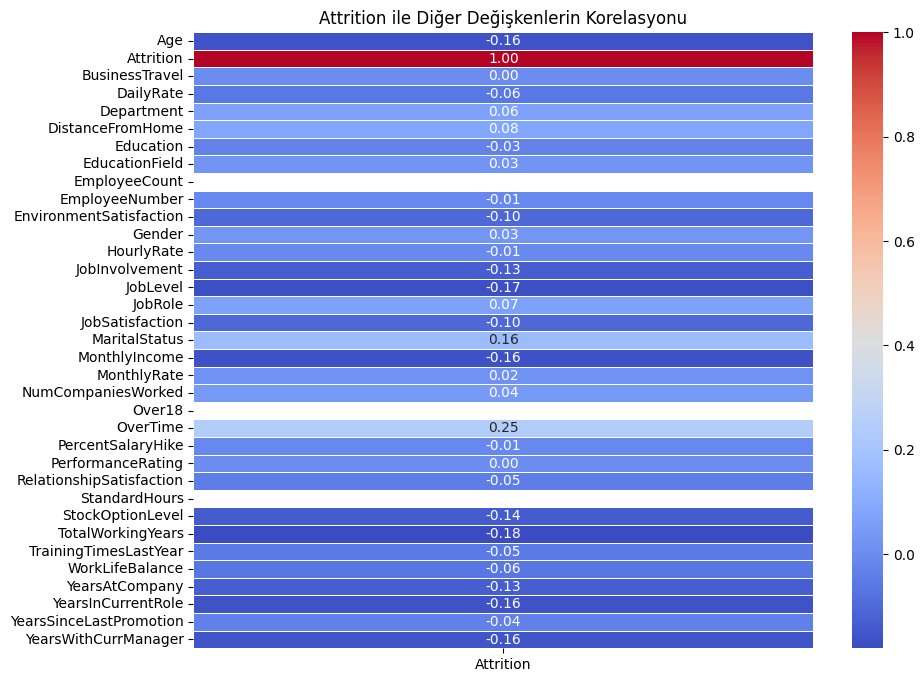

In [49]:
correlation_matrix = df.corr()
# Attrition ile diğer sayısal sütunların korelasyonlarını çek
corelation_matrix = correlation_matrix[['Attrition']]
# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(data=corelation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Attrition ile Diğer Değişkenlerin Korelasyonu')
plt.show()

# ÖZELLİK MÜHENDİSLİĞİ & FEATURE ENGINEERING

a. **Çalışan Memnuniyeti Skorları**
JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction ve WorkLifeBalance gibi memnuniyetle ilgili sütunlar, çalışanların işten ayrılma ihtimalini artıran faktörlerdir. Bu sütunların birleştirilerek yeni bir MemnuniyetSkoru.

In [50]:
df['MemnuniyetSkoru'] = df['JobSatisfaction'] + df['EnvironmentSatisfaction'] + df['RelationshipSatisfaction'] + df['WorkLifeBalance']

**Aylık Gelir ile Performans**
MonthlyIncome (Aylık Gelir) ve PerformanceRating (Performans Derecesi) özellikleri arasında bir ilişki kurarak gelirle performans arasındaki bağlantı.

In [51]:
df['GelirPerformansOranı'] = df['MonthlyIncome'] / (df['PerformanceRating'] + 1)  # Performans derecesine 1 ekliyoruz, çünkü 0 olabilir.

**Terfi Durumu ve Şirket İçindeki Süre**
YearsSinceLastPromotion (Son Terfi Süresi) ve YearsAtCompany (Şirketteki Süre), bir çalışanın terfi alma durumunu ve şirketteki süreyi gösterir. Bu bilgileri birleştirerek Terfi ve Süre skoru.

In [52]:
df['TerfiVeSürem'] = df['YearsSinceLastPromotion'] + df['YearsAtCompany']

**İş Doyumu**
JobInvolvement (İş Katılımı) ve JobLevel (İş Seviyesi) gibi özellikleri birleştirerek bir İş Doyumu Skoru 

In [53]:
df['İşDoyumuSkoru'] = df['JobInvolvement'] * df['JobLevel']

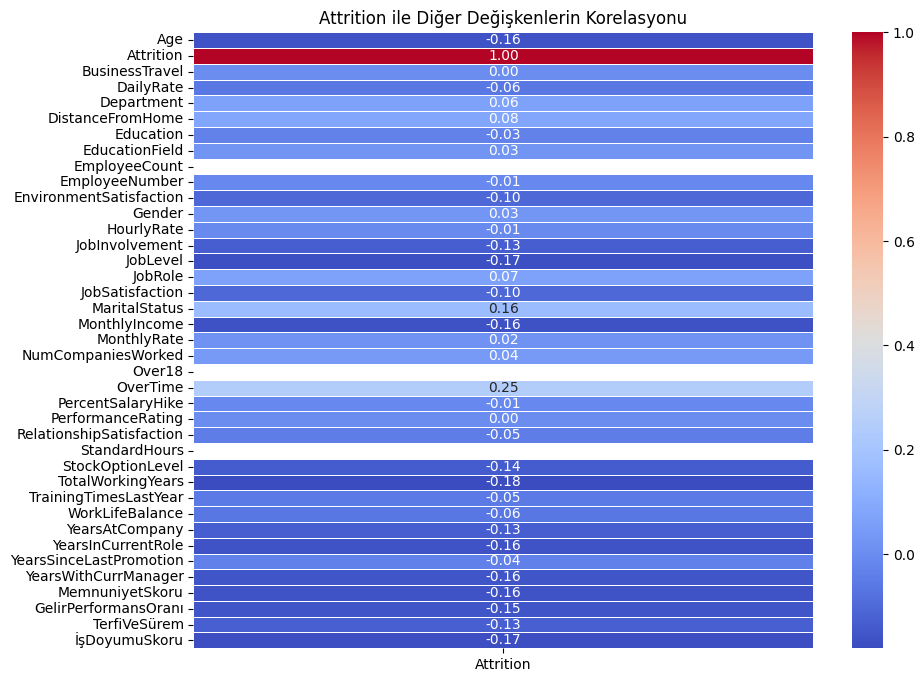

In [54]:
correlation_matrix = df.corr()
# Attrition ile diğer sayısal sütunların korelasyonlarını çek
corelation_matrix = correlation_matrix[['Attrition']]
# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(data=corelation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Attrition ile Diğer Değişkenlerin Korelasyonu')
plt.show()

# MODEL EĞİTİMİ VE KURULUMU  & MODEL TRAINING AND INSTALLATION


**Çalışanın İşten Çıkıp Çıkmama Durumunu Tahmin Etmek (Classification Model)Bu görev, bir sınıflandırma problemi olarak ele alınır. Hedef, Attrition sütununun (Evet veya Hayır) tahmin edilmesidir.**


In [55]:
# Logistic Regression modeli oluşturma
model = LogisticRegression(random_state=42, max_iter=1000)  # max_iter artırılarak konverjans sağlanabilir
model.fit(X_train, y_train)

# Test setinde tahmin yapma
y_pred = model.predict(X_test)

# Modeli değerlendirme
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# SMOTE uygulama
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Yeni sınıf dağılımı
print("Yeni sınıf dağılımı:", Counter(y_train_resampled))

# SMOTE ile dengelemeden sonra Logistic Regression
model_resampled = LogisticRegression(random_state=42, max_iter=1000)
model_resampled.fit(X_train_resampled, y_train_resampled)

# Test setinde tahmin yapma
y_pred_resampled = model_resampled.predict(X_test)

# Modeli değerlendirme (SMOTE sonrası)
print("Accuracy (SMOTE sonrası):", accuracy_score(y_test, y_pred_resampled))
print("Classification Report (SMOTE sonrası):\n", classification_report(y_test, y_pred_resampled))



Accuracy: 0.8616780045351474
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       380
           1       0.50      0.23      0.31        61

    accuracy                           0.86       441
   macro avg       0.69      0.60      0.62       441
weighted avg       0.83      0.86      0.84       441

Yeni sınıf dağılımı: Counter({0: 853, 1: 853})
Accuracy (SMOTE sonrası): 0.7891156462585034
Classification Report (SMOTE sonrası):
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       380
           1       0.32      0.48      0.38        61

    accuracy                           0.79       441
   macro avg       0.62      0.66      0.63       441
weighted avg       0.83      0.79      0.81       441



In [56]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression ile class weights
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Test setinde tahmin yapma
y_pred = model.predict(X_test)

# Modeli değerlendirme
print("Accuracy:", accuracy_score(y_test, y_pred))  # Doğruluk oranı
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Sınıflandırma raporu

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7482993197278912

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       380
           1       0.30      0.59      0.39        61

    accuracy                           0.75       441
   macro avg       0.61      0.68      0.62       441
weighted avg       0.83      0.75      0.78       441


Confusion Matrix:
 [[294  86]
 [ 25  36]]


In [58]:
# Hiperparametre aralıkları
param_grid = {
    'n_estimators': [100, 200, 300],  # Ağaç sayısı
    'max_depth': [None, 10, 20, 30],  # Maksimum derinlik
    'min_samples_split': [2, 5, 10],  # Düğümdeki minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],  # Yaprakta minimum örnek sayısı
    'max_features': ['auto', 'sqrt', 'log2'],  # Kullanılacak özellik sayısı
    'bootstrap': [True, False]  # Bootstrap örneklemesi kullanma
}

# Random Forest modelini oluştur
rf = RandomForestClassifier(random_state=42)

# GridSearchCV'yi başlat
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Eğitim verisi ile hiperparametre ayarını başlat
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi skoru yazdır
print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi skor: {grid_search.best_score_}")

# En iyi model ile tahminler yap
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Modeli değerlendirme
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


En iyi parametreler: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
En iyi skor: 0.857148946246744
Accuracy: 0.8662131519274376
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.60      0.10      0.17        61

    accuracy                           0.87       441
   macro avg       0.74      0.54      0.55       441
weighted avg       0.83      0.87      0.82       441



**MODEL:İŞDEN AYRILANLAR İÇİN  KÜMELEME (K-MEANS)**

In [59]:
new_df = df[df["Attrition"]==1]

In [60]:
new_df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0   0.446350          1               2   0.742527           2   
2   0.008343          1               2   1.414363           1   
14 -0.977174          1               2  -1.734097           1   
21 -0.101159          1               2   1.030102           2   
24 -0.320163          1               2  -0.256552           1   

    DistanceFromHome  Education  EducationField  EmployeeCount  \
0          -1.010909          1               1              0   
2          -0.887515          1               4              0   
14          1.827158          2               1              0   
21         -0.023755          3               1              0   
24         -0.393938          0               3              0   

    EmployeeNumber  ...  TrainingTimesLastYear  WorkLifeBalance  \
0        -1.701283  ...              -2.130765                0   
2        -1.696298  ...               0.278639                2   
14       -1.671374  ...               1.242400                2   
21       -1.658081  ...               1.242400                2   
24       -1.651434  ...              -0.685123                2   

    YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                6                   4                -0.776139   
2                0                   0                -0.776139   
14               4                   2                -0.776139   
21               5                   3                -0.776139   
24               4                   2                -0.372486   

    YearsWithCurrManager  MemnuniyetSkoru  GelirPerformansOranı  TerfiVeSürem  \
0                      5                4             -0.084766      5.223861   
2                      0                8             -0.981623     -0.776139   
14                     3                7             -0.995870      3.223861   
21                     3                5             -0.339497      4.223861   
24                     3                5             -0.781709      3.627514   

    İşDoyumuSkoru  
0               2  
2               0  
14              0  
21              0  
24              0  

[5 rows x 39 columns]

**K-MEANS  için  optimal k yı belirleme**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

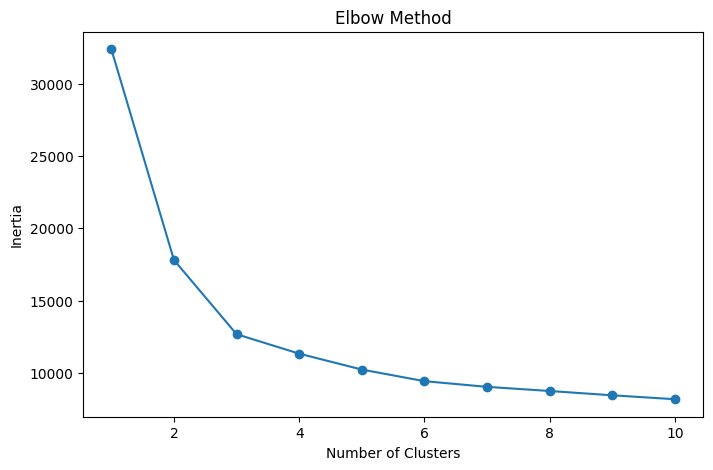

In [61]:
inertia = []
range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)

# Dirsek grafiği
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


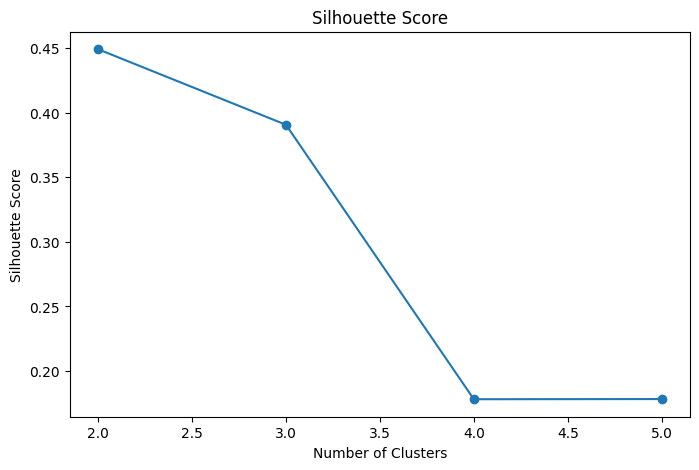

In [62]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5]
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(new_df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(new_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Silhouette Score Grafiği
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [63]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


range_n_clusters uzunluğu: 4
inertia uzunluğu: 10
Optimal küme sayısı: 3


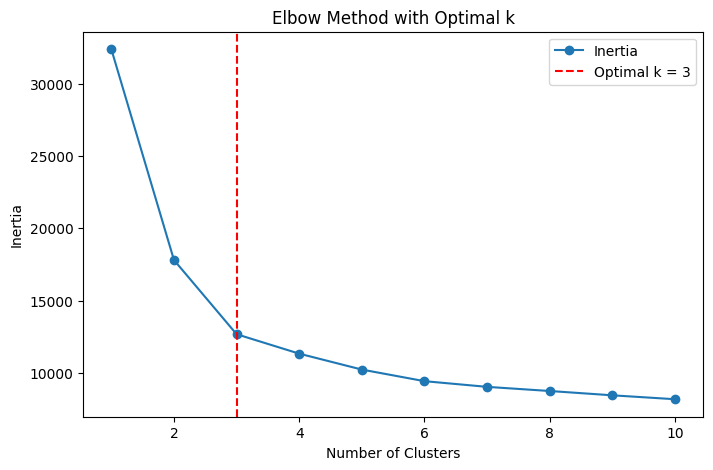

In [64]:
# range_n_clusters ve inertia uzunluk kontrolü
print(f"range_n_clusters uzunluğu: {len(range_n_clusters)}")
print(f"inertia uzunluğu: {len(inertia)}")

# Eğer değerler farklıysa range_n_clusters tekrar oluşturulmalı
range_n_clusters = range(1, len(inertia) + 1)  # inertia uzunluğuna göre ayarlanır

# Optimum k'yı belirleme
from kneed import KneeLocator

try:
    knee_locator = KneeLocator(range_n_clusters, inertia, curve='convex', direction='decreasing')
    optimal_k = knee_locator.knee
    print(f"Optimal küme sayısı: {optimal_k}")

    # Dirsek grafiği (optimum k işaretli)
    plt.figure(figsize=(8, 5))
    plt.plot(range_n_clusters, inertia, marker='o', label='Inertia')
    plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
    plt.title('Elbow Method with Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.legend()
    plt.show()

except ValueError as e:
    print("Hata:", e)
    print("range_n_clusters ve inertia uzunluklarını kontrol edin.")


**K-MEANS MODEL**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sayısal Sütunlar: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'MemnuniyetSkoru', 'GelirPerformansOranı',
       'TerfiVeSürem', 'İşDoyumuSkoru'],
      dtype='object')


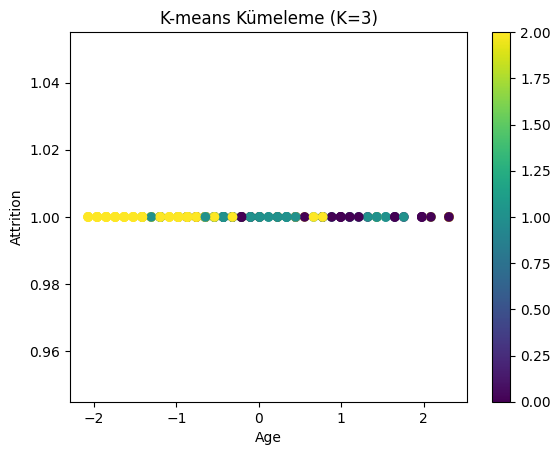

    Attrition  Cluster
0           1        1
2           1        2
14          1        2
21          1        1
24          1        2


In [65]:

# attack == 1 olanları filtreleyelim
df_attack = new_df[new_df['Attrition'] == 1]

# Sayısal özelliklerin sadece seçimi
numeric_features = df_attack.select_dtypes(include=['float64', 'int64'])

# Veriyi ölçeklendiriyoruz (K-means için)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# K-means algoritmasını uyguluyoruz (K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_attack['Cluster'] = kmeans.fit_predict(scaled_data)

# Sayısal sütunları görüntüleyelim
print("Sayısal Sütunlar:", numeric_features.columns)

# İki sayısal sütun seçip görselleştirme yapalım (örneğin, feature1 ve feature2 yerine gerçek sütun adlarını kullanın)
plt.scatter(df_attack[numeric_features.columns[0]], df_attack[numeric_features.columns[1]], c=df_attack['Cluster'], cmap='viridis')
plt.title('K-means Kümeleme (K=3)')
plt.xlabel(numeric_features.columns[0])  # İlk sayısal özelliğin adı
plt.ylabel(numeric_features.columns[1])  # İkinci sayısal özelliğin adı
plt.colorbar()
plt.show()


# Küme başlıklarını ve verileri inceleme
print(df_attack[['Attrition', 'Cluster']].head())

In [66]:
# Küme merkezlerini yazdırma
print("Küme merkezleri:\n", kmeans.cluster_centers_)


Küme merkezleri:
 [[ 0.87519617  0.          0.27426061 -0.1514396   0.38700824 -0.08330836
   0.15936311  0.06247224  0.          0.17131629  0.21998685 -0.05862985
  -0.06919071  0.14112941  1.37768094  0.05488953  0.26807234 -0.02553666
   1.37745622 -0.1604943   0.01891549  0.         -0.18849457 -0.08760646
  -0.04568803  0.29479838  0.          0.14479694  1.26743243 -0.21839019
   0.04841683  1.50944762  1.55012978  1.49387078  1.44092766  0.43672088
   1.34329977  1.58071656  1.13163737]
 [ 0.32891934  0.         -0.13261516  0.0240297   0.17867517  0.29321218
   0.17442255 -0.25090401  0.         -0.04457251 -0.60528287  0.10146406
   0.19725598 -0.12276293  0.25746338  0.1051235  -0.47410778 -0.00483025
   0.24814451 -0.07895238  0.59091594  0.         -0.13267778 -0.00163126
  -0.01268156 -0.38509894  0.          0.05655755  0.37283955  0.11823384
  -0.10122424 -0.11134549 -0.09849511 -0.20796076  0.01326827 -0.82520108
   0.23945233 -0.13116614  0.19203509]
 [-0.46361025  0

**K-MEANS HİPERPARAMETRE**

In [67]:
# K-means algoritması ile hiperparametre ayarları
kmeans = KMeans(n_clusters=3,            # Küme sayısı
                init='k-means++',        # Başlangıç merkezi seçimi
                n_init=20,               # Başlangıç merkezlerini 20 kez farklı şekilde seçme
                max_iter=500,            # Maksimum iterasyon sayısı
                tol=1e-4,                # Konverjans için tolerans
                random_state=42)         # Tekrar edilebilir sonuçlar için random_state

# Modeli eğitme
kmeans.fit(scaled_data)

# Kümeleme sonuçlarını gösterme
df_attack['Cluster'] = kmeans.labels_

# Küme merkezlerini yazdırma
print("Küme Merkezleri:\n", kmeans.cluster_centers_)

Küme Merkezleri:
 [[ 0.87519617  0.          0.27426061 -0.1514396   0.38700824 -0.08330836
   0.15936311  0.06247224  0.          0.17131629  0.21998685 -0.05862985
  -0.06919071  0.14112941  1.37768094  0.05488953  0.26807234 -0.02553666
   1.37745622 -0.1604943   0.01891549  0.         -0.18849457 -0.08760646
  -0.04568803  0.29479838  0.          0.14479694  1.26743243 -0.21839019
   0.04841683  1.50944762  1.55012978  1.49387078  1.44092766  0.43672088
   1.34329977  1.58071656  1.13163737]
 [ 0.32891934  0.         -0.13261516  0.0240297   0.17867517  0.29321218
   0.17442255 -0.25090401  0.         -0.04457251 -0.60528287  0.10146406
   0.19725598 -0.12276293  0.25746338  0.1051235  -0.47410778 -0.00483025
   0.24814451 -0.07895238  0.59091594  0.         -0.13267778 -0.00163126
  -0.01268156 -0.38509894  0.          0.05655755  0.37283955  0.11823384
  -0.10122424 -0.11134549 -0.09849511 -0.20796076  0.01326827 -0.82520108
   0.23945233 -0.13116614  0.19203509]
 [-0.46361025  0